## 📊 About the Dataset

---

### **Context**
The company has shared its annual car insurance data. Your task is to uncover real customer behaviors from this dataset.

---

### **Content**
- The columns represent practical, real-world features.
- **Outcome column:**  
    - `1` → Customer has claimed their loan  
    - `0` → Customer has not claimed their loan
- The dataset contains **19 features**:  
    - 18 are logs recorded by the company  
    - 1 is the outcome column

---

### **Acknowledgements**
- Most of the data is real; some parts are synthetically generated.

---

### **Inspiration**
This well-balanced dataset will help Kagglers gain deeper intuition about real customers and uncover the underlying stories within the data.

### 1) Understanding Data



* a) Understand Columns

* b) check dtype -> df[col].astype()

* c) Describe Numerical Cols

* d) Describe Categorical Cols



### 2) EXTRACT FEATURES + EDA (uni - bi(heatmap) - multi) -> Insights:

* Uni-variate Analysis

    - Histogram (values)

    - distplot (distrbution)

    - catigorical (pie / count)



* Bi-Variate Analysis

    * Num vs Num

        - Scatter (relationship btn 2 variables)

        - line (trend with time)

    * Num vs Cat (distrbution)

        - box

        - violin

        - strip

    * Cat vs Cat

        - bar (estimate plot)

        - countplot (count rows)



* Multi-Variate Analysis

    * Pairplot



### 3) Pre-Processing Mind Map:

* a) Detect & Handle Duplicates

* b) train_test_split

* c) Detect & Handle NaNs

* d) Detect & Handle Outliers

* e) Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])

* f) Imbalanced: X_train_resampled

* g) Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_resampled_scaled

In [268]:
# Manpulate
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Feature Extraction
# import user_agents # get info from user_agent (browser_info)
# from ip2geotools.databases.noncommercial import DbIpCity as ip2geo # get location from ip
# from geopy.distance import great_circle # distance btn 2 (lat,long)
# from geopy.geocoders import Nominatim # geocode("place") / reverse("lat,long")
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # text feature

# Pre-Processing
from sklearn.model_selection import train_test_split # train-test-split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer # detect & handle NaNs
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder # Ordinal Encoding, Nominal Encoding
from category_encoders import BinaryEncoder # Nominal Encoding
from imblearn.under_sampling import RandomUnderSampler # undersampling
from imblearn.over_sampling import RandomOverSampler, SMOTE # oversampling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # Scaling

# Modeling

## 1) Pipeline
from sklearn.pipeline import Pipeline, make_pipeline # to make pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector # apply pipeline to each column

## 2) Regression Models
from sklearn.linear_model import LinearRegression # if data is small and small_no_features
from sklearn.linear_model import SGDRegressor # if data is large: (can have penalty=constrains)
from sklearn.preprocessing import PolynomialFeatures # for polynomial regresion (then apply scaling after it)
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV # Regularization

## 2') Classfication Models
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB, MultinomialNB
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor # Bagging & Pasting
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, HistGradientBoostingClassifier, HistGradientBoostingRegressor # Boosting
from sklearn.ensemble import VotingClassifier, VotingRegressor # Ensemble (Voting)
from sklearn.ensemble import StackingClassifier, StackingRegressor # Stacking

## 3) Model Selection (Underfitting vs Overfitting) [bias variance tradeoff => perfect model complexity]
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV, RandomizedSearchCV # (Train - Valid - Test) + hyperparameters tunning
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, HalvingRandomSearchCV # if data / features is large
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # Evaluate Model: r2=> accuracy, L2-norm: if no outliers, L1-norm: if outliers
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from scipy import stats # Confidence Interval of Accuracy / Loss / Utility
import joblib # save model

### 1) Understanding Data



* a) Understand Columns

* b) check dtype -> df[col].astype()

* c) Describe Numerical Cols

* d) Describe Categorical Cols

In [74]:
df = pd.read_csv("./Car_Insurance_Claim.csv")
df# load data

ID    AGE  GENDER      RACE DRIVING_EXPERIENCE    EDUCATION  \
0     569520    65+  female  majority               0-9y  high school   
1     750365  16-25    male  majority               0-9y         none   
2     199901  16-25  female  majority               0-9y  high school   
3     478866  16-25    male  majority               0-9y   university   
4     731664  26-39    male  majority             10-19y         none   
...      ...    ...     ...       ...                ...          ...   
9995  323164  26-39  female  majority             10-19y   university   
9996  910346  26-39  female  majority             10-19y         none   
9997  468409  26-39    male  majority               0-9y  high school   
9998  903459  26-39  female  majority             10-19y  high school   
9999  442696  26-39  female  majority               0-9y         none   

             INCOME  CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  \
0       upper class      0.629027                1.0   after 2015      0.0   
1           poverty      0.357757                0.0  before 2015      0.0   
2     working class      0.493146                1.0  before 2015      0.0   
3     working class      0.206013                1.0  before 2015      0.0   
4     working class      0.388366                1.0  before 2015      0.0   
...             ...           ...                ...          ...      ...   
9995    upper class      0.582787                1.0  before 2015      0.0   
9996   middle class      0.522231                1.0   after 2015      0.0   
9997   middle class      0.470940                1.0  before 2015      0.0   
9998        poverty      0.364185                0.0  before 2015      0.0   
9999  working class      0.435225                1.0  before 2015      1.0   

      CHILDREN  POSTAL_CODE  ANNUAL_MILEAGE VEHICLE_TYPE  SPEEDING_VIOLATIONS  \
0          1.0        10238         12000.0        sedan                    0   
1          0.0        10238         16000.0        sedan                    0   
2          0.0        10238         11000.0        sedan                    0   
3          1.0        32765         11000.0        sedan                    0   
4          0.0        32765         12000.0        sedan                    2   
...        ...          ...             ...          ...                  ...   
9995       0.0        10238         16000.0        sedan                    0   
9996       1.0        32765             NaN        sedan                    1   
9997       1.0        10238         14000.0        sedan                    0   
9998       1.0        10238         13000.0        sedan                    2   
9999       1.0        10238         13000.0        sedan                    0   

      DUIS  PAST_ACCIDENTS  OUTCOME  
0        0               0      0.0  
1        0               0      1.0  
2        0               0      0.0  
3        0               0      0.0  
4        0               1      1.0  
...    ...             ...      ...  
9995     0               1      0.0  
9996     0               0      0.0  
9997     0               0      0.0  
9998     0               1      1.0  
9999     0               0      0.0  

[10000 rows x 19 columns]

In [75]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [76]:
# col_lower = [col.lower() for col in df.columns]
# df.columns = col_lower # make all columns lower case
# df = df
# df 

In [77]:
df.select_dtypes(include='number').describe() # get summary statistics

ID  CREDIT_SCORE  VEHICLE_OWNERSHIP       MARRIED  \
count   10000.000000   9018.000000       10000.000000  10000.000000   
mean   500521.906800      0.515813           0.697000      0.498200   
std    290030.768758      0.137688           0.459578      0.500022   
min       101.000000      0.053358           0.000000      0.000000   
25%    249638.500000      0.417191           0.000000      0.000000   
50%    501777.000000      0.525033           1.000000      0.000000   
75%    753974.500000      0.618312           1.000000      1.000000   
max    999976.000000      0.960819           1.000000      1.000000   

           CHILDREN   POSTAL_CODE  ANNUAL_MILEAGE  SPEEDING_VIOLATIONS  \
count  10000.000000  10000.000000     9043.000000         10000.000000   
mean       0.688800  19864.548400    11697.003207             1.482900   
std        0.463008  18915.613855     2818.434528             2.241966   
min        0.000000  10238.000000     2000.000000             0.000000   
25%        0.000000  10238.000000    10000.000000             0.000000   
50%        1.000000  10238.000000    12000.000000             0.000000   
75%        1.000000  32765.000000    14000.000000             2.000000   
max        1.000000  92101.000000    22000.000000            22.000000   

              DUIS  PAST_ACCIDENTS       OUTCOME  
count  10000.00000    10000.000000  10000.000000  
mean       0.23920        1.056300      0.313300  
std        0.55499        1.652454      0.463858  
min        0.00000        0.000000      0.000000  
25%        0.00000        0.000000      0.000000  
50%        0.00000        0.000000      0.000000  
75%        0.00000        2.000000      1.000000  
max        6.00000       15.000000      1.000000

In [78]:
cat_cols = df.select_dtypes(include="O").columns

for col in cat_cols:
    print(f"number of uniques of \'{col}\' is: {df[col].nunique()}")
    print(f"uniques of \'{col}\' is:\n{df[col].unique()}")
    print()
    print('*' * 50)
    print()

number of uniques of 'AGE' is: 4
uniques of 'AGE' is:
['65+' '16-25' '26-39' '40-64']

**************************************************

number of uniques of 'GENDER' is: 2
uniques of 'GENDER' is:
['female' 'male']

**************************************************

number of uniques of 'RACE' is: 2
uniques of 'RACE' is:
['majority' 'minority']

**************************************************

number of uniques of 'DRIVING_EXPERIENCE' is: 4
uniques of 'DRIVING_EXPERIENCE' is:
['0-9y' '10-19y' '20-29y' '30y+']

**************************************************

number of uniques of 'EDUCATION' is: 3
uniques of 'EDUCATION' is:
['high school' 'none' 'university']

**************************************************

number of uniques of 'INCOME' is: 4
uniques of 'INCOME' is:
['upper class' 'poverty' 'working class' 'middle class']

**************************************************

number of uniques of 'VEHICLE_YEAR' is: 2
uniques of 'VEHICLE_YEAR' is:
['after 2015' 'before 2015']


In [79]:
for col in cat_cols:
    print(f"count of each unique in column \'{col}\' is:\n{df[col].value_counts()}")
    print()
    print('*' * 50)
    print()

count of each unique in column 'AGE' is:
AGE
26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: count, dtype: int64

**************************************************

count of each unique in column 'GENDER' is:
GENDER
female    5010
male      4990
Name: count, dtype: int64

**************************************************

count of each unique in column 'RACE' is:
RACE
majority    9012
minority     988
Name: count, dtype: int64

**************************************************

count of each unique in column 'DRIVING_EXPERIENCE' is:
DRIVING_EXPERIENCE
0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: count, dtype: int64

**************************************************

count of each unique in column 'EDUCATION' is:
EDUCATION
high school    4157
university     3928
none           1915
Name: count, dtype: int64

**************************************************

count of each unique in column 'INCOME' is:
INCOME
upper class      4336
middle class     

In [80]:
df

ID    AGE  GENDER      RACE DRIVING_EXPERIENCE    EDUCATION  \
0     569520    65+  female  majority               0-9y  high school   
1     750365  16-25    male  majority               0-9y         none   
2     199901  16-25  female  majority               0-9y  high school   
3     478866  16-25    male  majority               0-9y   university   
4     731664  26-39    male  majority             10-19y         none   
...      ...    ...     ...       ...                ...          ...   
9995  323164  26-39  female  majority             10-19y   university   
9996  910346  26-39  female  majority             10-19y         none   
9997  468409  26-39    male  majority               0-9y  high school   
9998  903459  26-39  female  majority             10-19y  high school   
9999  442696  26-39  female  majority               0-9y         none   

             INCOME  CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  \
0       upper class      0.629027                1.0   after 2015      0.0   
1           poverty      0.357757                0.0  before 2015      0.0   
2     working class      0.493146                1.0  before 2015      0.0   
3     working class      0.206013                1.0  before 2015      0.0   
4     working class      0.388366                1.0  before 2015      0.0   
...             ...           ...                ...          ...      ...   
9995    upper class      0.582787                1.0  before 2015      0.0   
9996   middle class      0.522231                1.0   after 2015      0.0   
9997   middle class      0.470940                1.0  before 2015      0.0   
9998        poverty      0.364185                0.0  before 2015      0.0   
9999  working class      0.435225                1.0  before 2015      1.0   

      CHILDREN  POSTAL_CODE  ANNUAL_MILEAGE VEHICLE_TYPE  SPEEDING_VIOLATIONS  \
0          1.0        10238         12000.0        sedan                    0   
1          0.0        10238         16000.0        sedan                    0   
2          0.0        10238         11000.0        sedan                    0   
3          1.0        32765         11000.0        sedan                    0   
4          0.0        32765         12000.0        sedan                    2   
...        ...          ...             ...          ...                  ...   
9995       0.0        10238         16000.0        sedan                    0   
9996       1.0        32765             NaN        sedan                    1   
9997       1.0        10238         14000.0        sedan                    0   
9998       1.0        10238         13000.0        sedan                    2   
9999       1.0        10238         13000.0        sedan                    0   

      DUIS  PAST_ACCIDENTS  OUTCOME  
0        0               0      0.0  
1        0               0      1.0  
2        0               0      0.0  
3        0               0      0.0  
4        0               1      1.0  
...    ...             ...      ...  
9995     0               1      0.0  
9996     0               0      0.0  
9997     0               0      0.0  
9998     0               1      1.0  
9999     0               0      0.0  

[10000 rows x 19 columns]

In [81]:
df.drop(columns=["ID"], inplace=True)
df 

AGE  GENDER      RACE DRIVING_EXPERIENCE    EDUCATION         INCOME  \
0       65+  female  majority               0-9y  high school    upper class   
1     16-25    male  majority               0-9y         none        poverty   
2     16-25  female  majority               0-9y  high school  working class   
3     16-25    male  majority               0-9y   university  working class   
4     26-39    male  majority             10-19y         none  working class   
...     ...     ...       ...                ...          ...            ...   
9995  26-39  female  majority             10-19y   university    upper class   
9996  26-39  female  majority             10-19y         none   middle class   
9997  26-39    male  majority               0-9y  high school   middle class   
9998  26-39  female  majority             10-19y  high school        poverty   
9999  26-39  female  majority               0-9y         none  working class   

      CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  CHILDREN  \
0         0.629027                1.0   after 2015      0.0       1.0   
1         0.357757                0.0  before 2015      0.0       0.0   
2         0.493146                1.0  before 2015      0.0       0.0   
3         0.206013                1.0  before 2015      0.0       1.0   
4         0.388366                1.0  before 2015      0.0       0.0   
...            ...                ...          ...      ...       ...   
9995      0.582787                1.0  before 2015      0.0       0.0   
9996      0.522231                1.0   after 2015      0.0       1.0   
9997      0.470940                1.0  before 2015      0.0       1.0   
9998      0.364185                0.0  before 2015      0.0       1.0   
9999      0.435225                1.0  before 2015      1.0       1.0   

      POSTAL_CODE  ANNUAL_MILEAGE VEHICLE_TYPE  SPEEDING_VIOLATIONS  DUIS  \
0           10238         12000.0        sedan                    0     0   
1           10238         16000.0        sedan                    0     0   
2           10238         11000.0        sedan                    0     0   
3           32765         11000.0        sedan                    0     0   
4           32765         12000.0        sedan                    2     0   
...           ...             ...          ...                  ...   ...   
9995        10238         16000.0        sedan                    0     0   
9996        32765             NaN        sedan                    1     0   
9997        10238         14000.0        sedan                    0     0   
9998        10238         13000.0        sedan                    2     0   
9999        10238         13000.0        sedan                    0     0   

      PAST_ACCIDENTS  OUTCOME  
0                  0      0.0  
1                  0      1.0  
2                  0      0.0  
3                  0      0.0  
4                  1      1.0  
...              ...      ...  
9995               1      0.0  
9996               0      0.0  
9997               0      0.0  
9998               1      1.0  
9999               0      0.0  

[10000 rows x 18 columns]

In [82]:
df.drop(columns=["POSTAL_CODE"], inplace=True)


## 2) Extract Features

In [83]:
def extract_new_features(df):
    df = df.copy()

    # 1. AGE_RISK_LEVEL
    def map_age_risk(age_group):
        if age_group == '16-25':
            return 'high_risk'
        elif age_group == '26-39':
            return 'medium_risk'
        elif age_group in ['40-64', '65+']:
            return 'low_risk'
        return 'unknown'

    df['AGE_RISK_LEVEL'] = df['AGE'].apply(map_age_risk)

    # 2. DRIVING_EXPERIENCE_YEARS
    def experience_to_numeric(exp_str):
        if exp_str == '0-9y':
            return 4.5
        elif exp_str == '10-19y':
            return 14.5
        elif exp_str == '20-29y':
            return 24.5
        elif exp_str == '30y+':
            return 35
        return 0

    df['DRIVING_EXPERIENCE'] = df['DRIVING_EXPERIENCE'].apply(experience_to_numeric)

    # 3. TOTAL_VIOLATIONS
    df['TOTAL_VIOLATIONS'] = (
        df['SPEEDING_VIOLATIONS'] +
        df['DUIS'] +
        df['PAST_ACCIDENTS']
    )

    # 4. DAILY_MILEAGE_ESTIMATE
    df['DAILY_MILEAGE_ESTIMATE'] = df['ANNUAL_MILEAGE'] / 365

    # 5. IS_FAMILY_DRIVER
    df['IS_FAMILY_DRIVER'] = ((df['MARRIED'] == 1) & (df['CHILDREN'] > 0)).astype(int)

    return df


In [84]:
df = extract_new_features(df) 
df

AGE  GENDER      RACE  DRIVING_EXPERIENCE    EDUCATION         INCOME  \
0       65+  female  majority                 4.5  high school    upper class   
1     16-25    male  majority                 4.5         none        poverty   
2     16-25  female  majority                 4.5  high school  working class   
3     16-25    male  majority                 4.5   university  working class   
4     26-39    male  majority                14.5         none  working class   
...     ...     ...       ...                 ...          ...            ...   
9995  26-39  female  majority                14.5   university    upper class   
9996  26-39  female  majority                14.5         none   middle class   
9997  26-39    male  majority                 4.5  high school   middle class   
9998  26-39  female  majority                14.5  high school        poverty   
9999  26-39  female  majority                 4.5         none  working class   

      CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  ...  \
0         0.629027                1.0   after 2015      0.0  ...   
1         0.357757                0.0  before 2015      0.0  ...   
2         0.493146                1.0  before 2015      0.0  ...   
3         0.206013                1.0  before 2015      0.0  ...   
4         0.388366                1.0  before 2015      0.0  ...   
...            ...                ...          ...      ...  ...   
9995      0.582787                1.0  before 2015      0.0  ...   
9996      0.522231                1.0   after 2015      0.0  ...   
9997      0.470940                1.0  before 2015      0.0  ...   
9998      0.364185                0.0  before 2015      0.0  ...   
9999      0.435225                1.0  before 2015      1.0  ...   

      ANNUAL_MILEAGE  VEHICLE_TYPE SPEEDING_VIOLATIONS  DUIS  PAST_ACCIDENTS  \
0            12000.0         sedan                   0     0               0   
1            16000.0         sedan                   0     0               0   
2            11000.0         sedan                   0     0               0   
3            11000.0         sedan                   0     0               0   
4            12000.0         sedan                   2     0               1   
...              ...           ...                 ...   ...             ...   
9995         16000.0         sedan                   0     0               1   
9996             NaN         sedan                   1     0               0   
9997         14000.0         sedan                   0     0               0   
9998         13000.0         sedan                   2     0               1   
9999         13000.0         sedan                   0     0               0   

      OUTCOME  AGE_RISK_LEVEL TOTAL_VIOLATIONS  DAILY_MILEAGE_ESTIMATE  \
0         0.0        low_risk                0               32.876712   
1         1.0       high_risk                0               43.835616   
2         0.0       high_risk                0               30.136986   
3         0.0       high_risk                0               30.136986   
4         1.0     medium_risk                3               32.876712   
...       ...             ...              ...                     ...   
9995      0.0     medium_risk                1               43.835616   
9996      0.0     medium_risk                1                     NaN   
9997      0.0     medium_risk                0               38.356164   
9998      1.0     medium_risk                3               35.616438   
9999      0.0     medium_risk                0               35.616438   

      IS_FAMILY_DRIVER  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
9995                 0  
9996                 0  
9997                 0  
9998                 0  
9999                 1  

[10000 rows x 21 columns]

In [111]:
df.drop(columns=["AGE"], inplace=True)
df 

GENDER      RACE  DRIVING_EXPERIENCE    EDUCATION         INCOME  \
0     female  majority                 4.5  high school    upper class   
1       male  majority                 4.5         none        poverty   
2     female  majority                 4.5  high school  working class   
3       male  majority                 4.5   university  working class   
4       male  majority                14.5         none  working class   
...      ...       ...                 ...          ...            ...   
9949  female  majority                14.5   university    upper class   
9950  female  majority                14.5         none   middle class   
9951    male  majority                 4.5  high school   middle class   
9952  female  majority                14.5  high school        poverty   
9953  female  majority                 4.5         none  working class   

      CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  CHILDREN  \
0         0.629027                1.0   after 2015      0.0       1.0   
1         0.357757                0.0  before 2015      0.0       0.0   
2         0.493146                1.0  before 2015      0.0       0.0   
3         0.206013                1.0  before 2015      0.0       1.0   
4         0.388366                1.0  before 2015      0.0       0.0   
...            ...                ...          ...      ...       ...   
9949      0.582787                1.0  before 2015      0.0       0.0   
9950      0.522231                1.0   after 2015      0.0       1.0   
9951      0.470940                1.0  before 2015      0.0       1.0   
9952      0.364185                0.0  before 2015      0.0       1.0   
9953      0.435225                1.0  before 2015      1.0       1.0   

      ANNUAL_MILEAGE VEHICLE_TYPE  SPEEDING_VIOLATIONS  DUIS  PAST_ACCIDENTS  \
0            12000.0        sedan                    0     0               0   
1            16000.0        sedan                    0     0               0   
2            11000.0        sedan                    0     0               0   
3            11000.0        sedan                    0     0               0   
4            12000.0        sedan                    2     0               1   
...              ...          ...                  ...   ...             ...   
9949         16000.0        sedan                    0     0               1   
9950             NaN        sedan                    1     0               0   
9951         14000.0        sedan                    0     0               0   
9952         13000.0        sedan                    2     0               1   
9953         13000.0        sedan                    0     0               0   

      OUTCOME AGE_RISK_LEVEL  TOTAL_VIOLATIONS  DAILY_MILEAGE_ESTIMATE  \
0         0.0       low_risk                 0               32.876712   
1         1.0      high_risk                 0               43.835616   
2         0.0      high_risk                 0               30.136986   
3         0.0      high_risk                 0               30.136986   
4         1.0    medium_risk                 3               32.876712   
...       ...            ...               ...                     ...   
9949      0.0    medium_risk                 1               43.835616   
9950      0.0    medium_risk                 1                     NaN   
9951      0.0    medium_risk                 0               38.356164   
9952      1.0    medium_risk                 3               35.616438   
9953      0.0    medium_risk                 0               35.616438   

      IS_FAMILY_DRIVER  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
9949                 0  
9950                 0  
9951                 0  
9952                 0  
9953                 1  

[9954 rows x 20 columns]

In [85]:
for col in cat_cols:
    print(f"number of uniques of \'{col}\' is: {df[col].nunique()}")
    print(f"uniques of \'{col}\' is:\n{df[col].unique()}")
    print()
    print('*' * 50)
    print()

number of uniques of 'AGE' is: 4
uniques of 'AGE' is:
['65+' '16-25' '26-39' '40-64']

**************************************************

number of uniques of 'GENDER' is: 2
uniques of 'GENDER' is:
['female' 'male']

**************************************************

number of uniques of 'RACE' is: 2
uniques of 'RACE' is:
['majority' 'minority']

**************************************************

number of uniques of 'DRIVING_EXPERIENCE' is: 4
uniques of 'DRIVING_EXPERIENCE' is:
[ 4.5 14.5 24.5 35. ]

**************************************************

number of uniques of 'EDUCATION' is: 3
uniques of 'EDUCATION' is:
['high school' 'none' 'university']

**************************************************

number of uniques of 'INCOME' is: 4
uniques of 'INCOME' is:
['upper class' 'poverty' 'working class' 'middle class']

**************************************************

number of uniques of 'VEHICLE_YEAR' is: 2
uniques of 'VEHICLE_YEAR' is:
['after 2015' 'before 2015']

***********

In [86]:
for col in cat_cols:
    print(f"count of each unique in column \'{col}\' is:\n{df[col].value_counts()}")
    print()
    print('*' * 50)
    print()

count of each unique in column 'AGE' is:
AGE
26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: count, dtype: int64

**************************************************

count of each unique in column 'GENDER' is:
GENDER
female    5010
male      4990
Name: count, dtype: int64

**************************************************

count of each unique in column 'RACE' is:
RACE
majority    9012
minority     988
Name: count, dtype: int64

**************************************************

count of each unique in column 'DRIVING_EXPERIENCE' is:
DRIVING_EXPERIENCE
4.5     3530
14.5    3299
24.5    2119
35.0    1052
Name: count, dtype: int64

**************************************************

count of each unique in column 'EDUCATION' is:
EDUCATION
high school    4157
university     3928
none           1915
Name: count, dtype: int64

**************************************************

count of each unique in column 'INCOME' is:
INCOME
upper class      4336
middle class     2138
pov

In [87]:
sns.set(font_scale = 2)

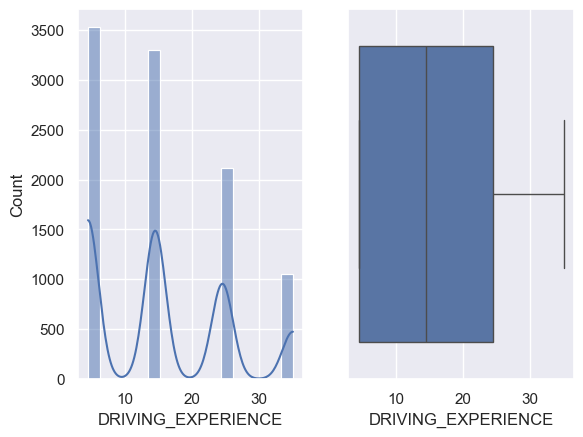

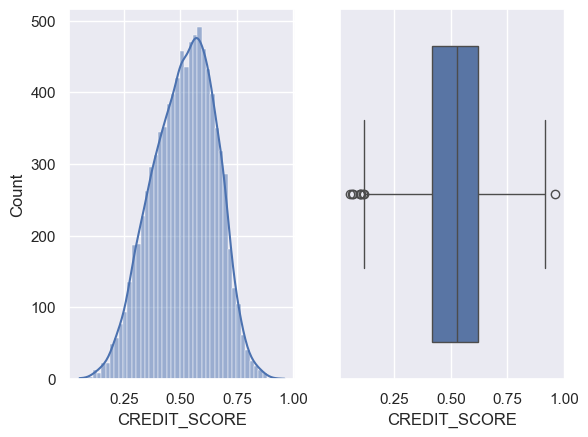

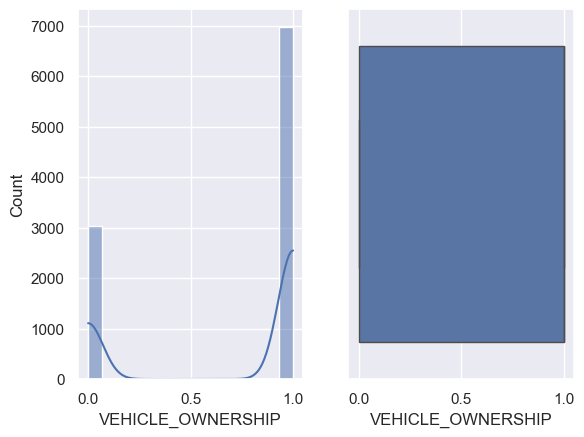

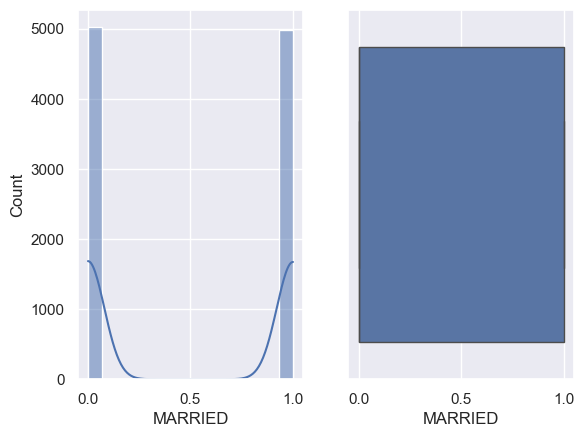

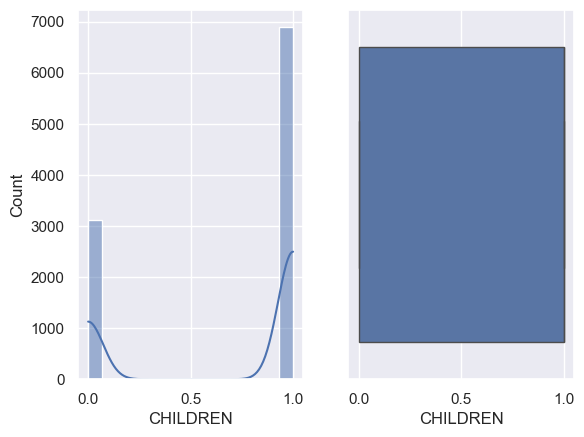

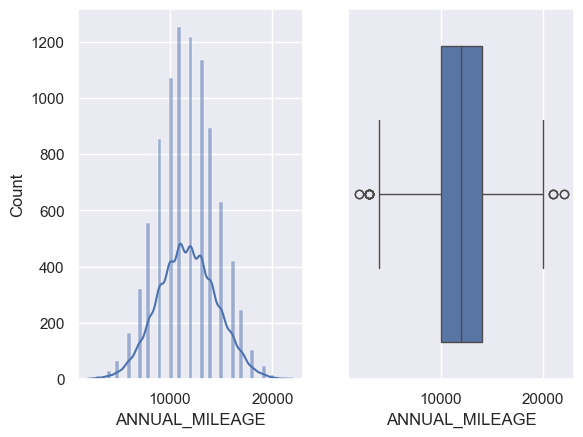

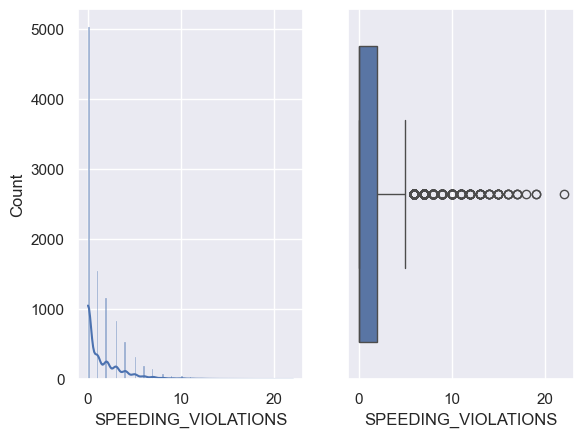

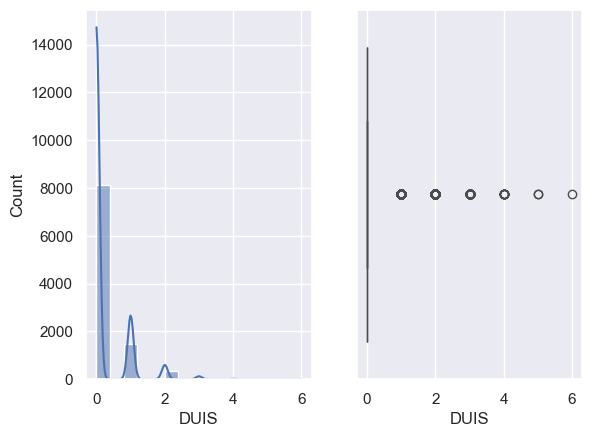

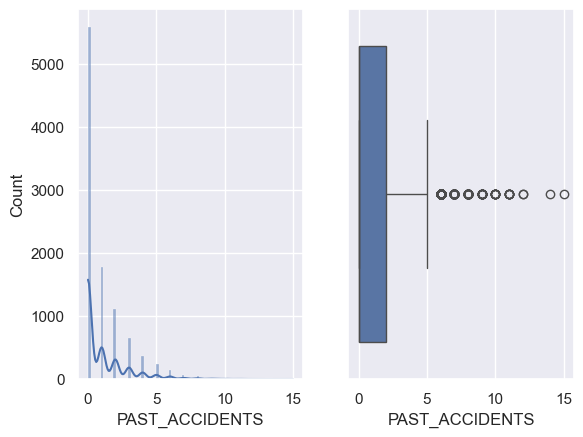

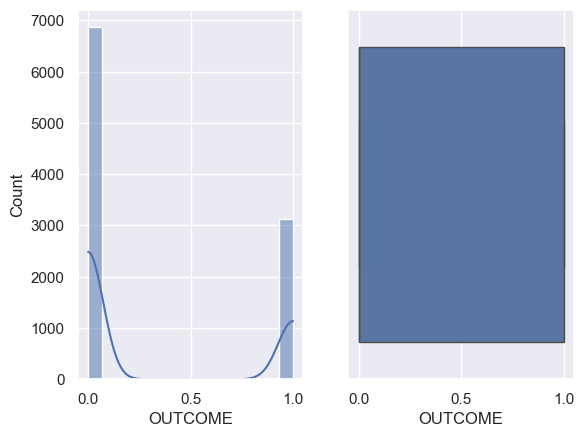

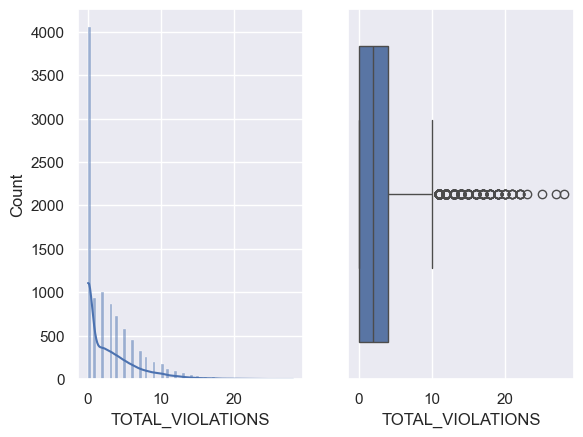

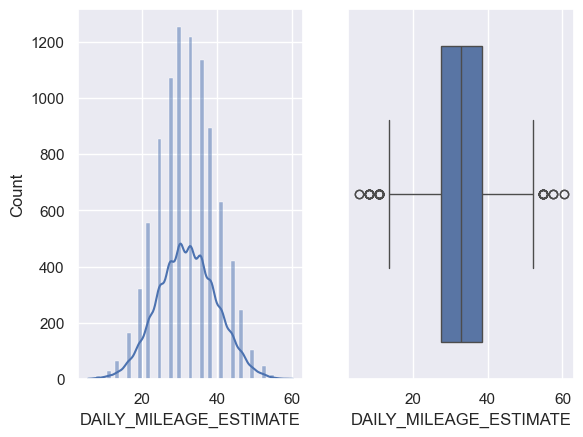

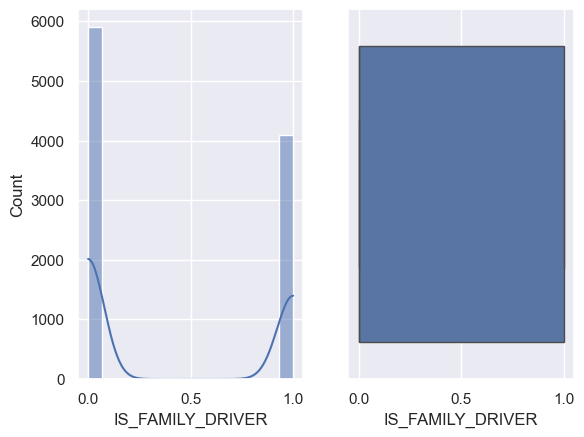

In [88]:
# UniVariate Analysis

num_cols = df.select_dtypes(include="number").columns

for col in num_cols:
    sns.set(font_scale = 1)
    fig, axes= plt.subplots(nrows=1, ncols=2)
    sns.histplot(df[col], kde=True, ax=axes[0])
    sns.boxplot(x=df[col], ax=axes[1])
    
    plt.show()


In [89]:
# total_valiations , past_accidents, speeding_violations, duis   -- > right skewed , outliers
# age, annual_mileage, driving_experience, children, age_risk_level -- > normal distribution

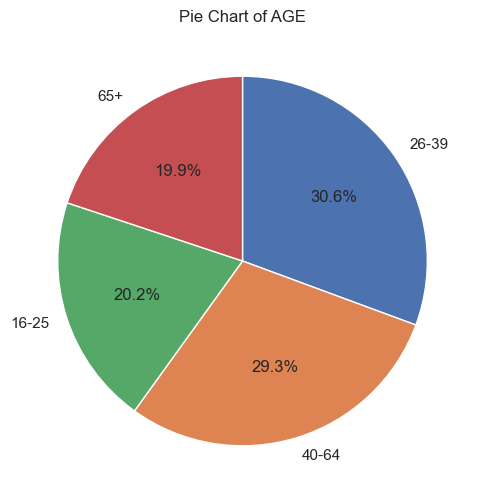

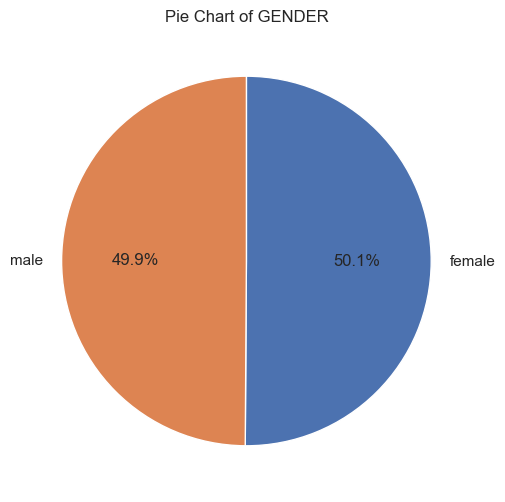

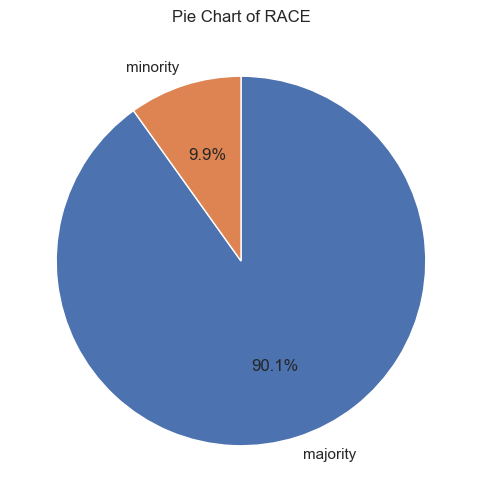

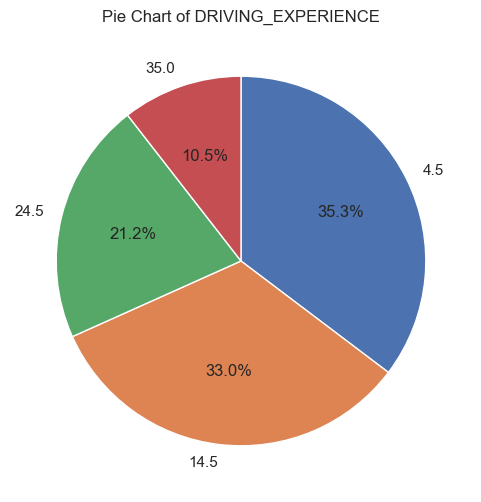

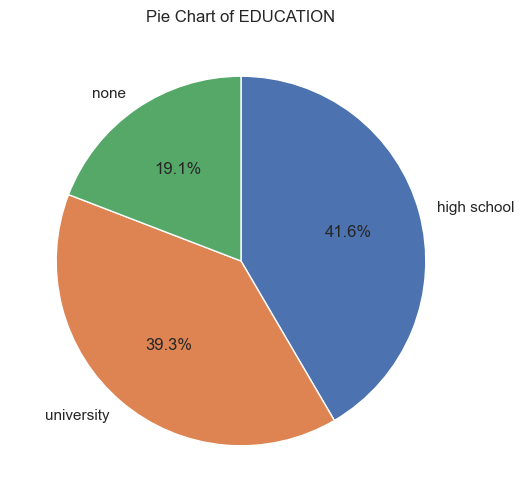

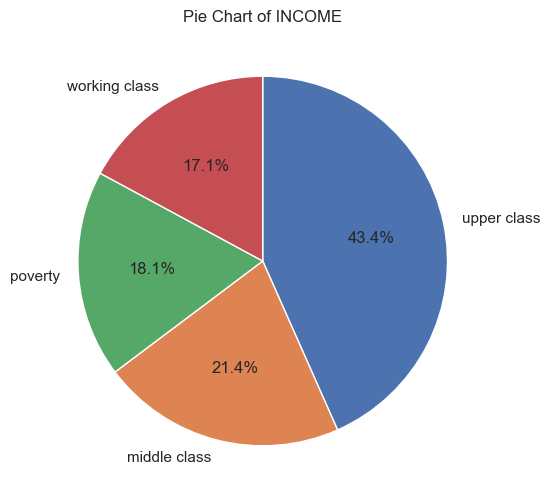

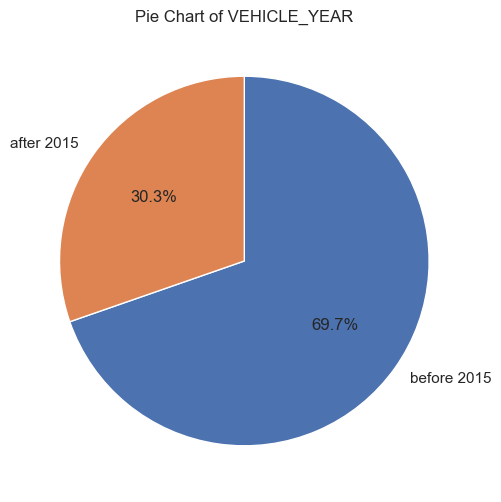

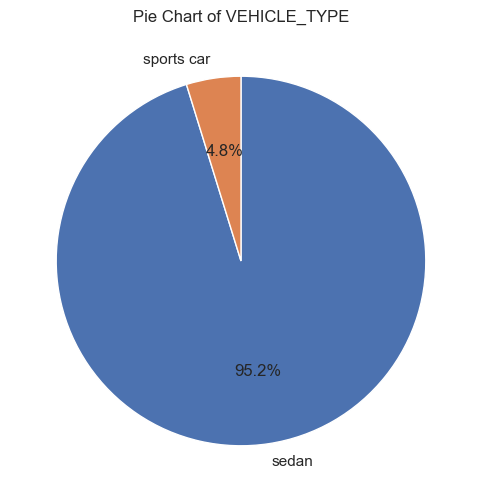

In [90]:
for col in cat_cols:
    plt.figure(figsize=(6, 6))
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False)
    plt.title(f'Pie Chart of {col}')
    plt.ylabel('')
    plt.show()

In [ ]:
# What demographic groups are most likely to file an insurance claim?

# Does driving experience significantly reduce the likelihood of an accident claim?

# How does annual mileage impact the probability of filing a claim?

# Do drivers with DUIs or past violations file more claims?

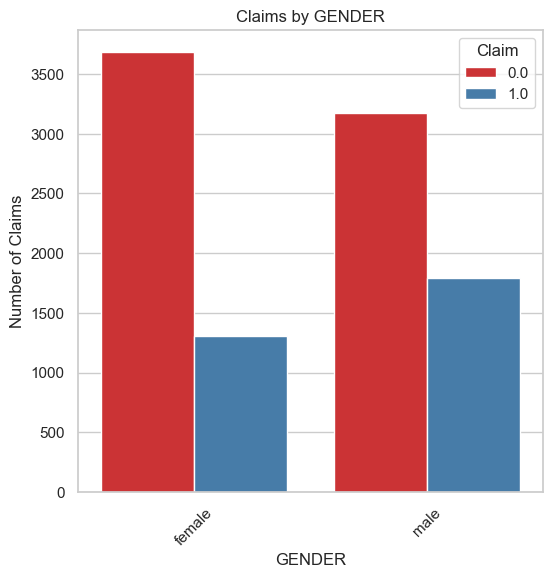

In [249]:
# What demographic groups are most likely to file an insurance claim?
# Plot claims by demographic group (e.g., GENDER, RACE, AGE_RISK_LEVEL)
demographic_col = 'GENDER'  # Change to 'RACE', 'AGE_RISK_LEVEL', etc. as needed
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x=demographic_col, hue='OUTCOME', palette='Set1')
plt.title(f'Claims by {demographic_col}')
plt.xlabel(demographic_col)
plt.ylabel('Number of Claims')
plt.legend(title='Claim', loc='upper right')
plt.xticks(rotation=45)
plt.show()

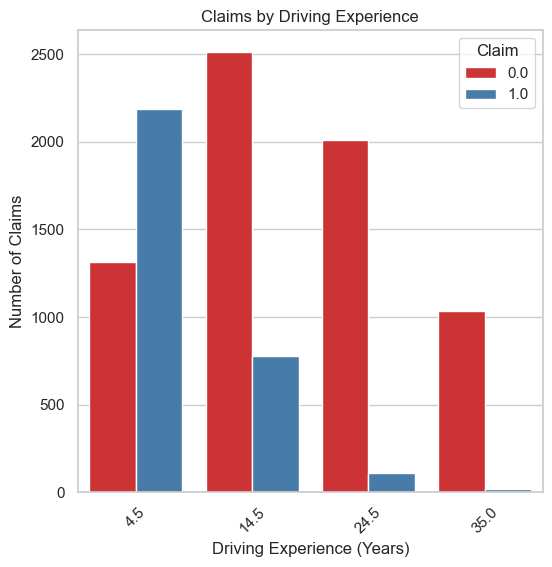

In [250]:
# Does driving experience significantly reduce the likelihood of an accident claim?

plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='DRIVING_EXPERIENCE', hue='OUTCOME', palette='Set1')
plt.title('Claims by Driving Experience')   
plt.xlabel('Driving Experience (Years)')
plt.ylabel('Number of Claims')
plt.legend(title='Claim', loc='upper right')
plt.xticks(rotation=45)
plt.show()

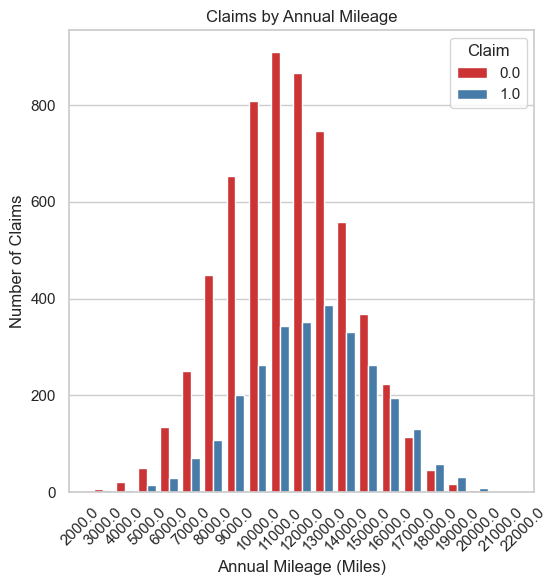

In [251]:
# How does annual mileage impact the probability of filing a claim?
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='ANNUAL_MILEAGE', hue='OUTCOME', palette='Set1')
plt.title('Claims by Annual Mileage')
plt.xlabel('Annual Mileage (Miles)')
plt.ylabel('Number of Claims')
plt.legend(title='Claim', loc='upper right')
plt.xticks(rotation=45)
plt.show()


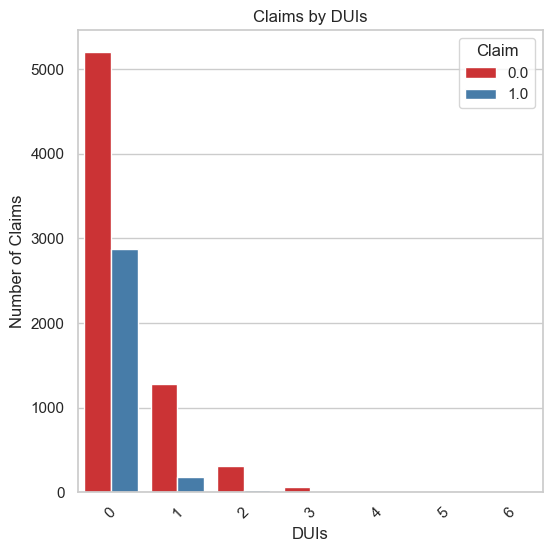

In [252]:
# Do drivers with DUIs or past violations file more claims?
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='DUIS', hue='OUTCOME', palette='Set1')
plt.title('Claims by DUIs')
plt.xlabel('DUIs')
plt.ylabel('Number of Claims')
plt.legend(title='Claim', loc='upper right')
plt.xticks(rotation=45)
plt.show()

<Axes: >

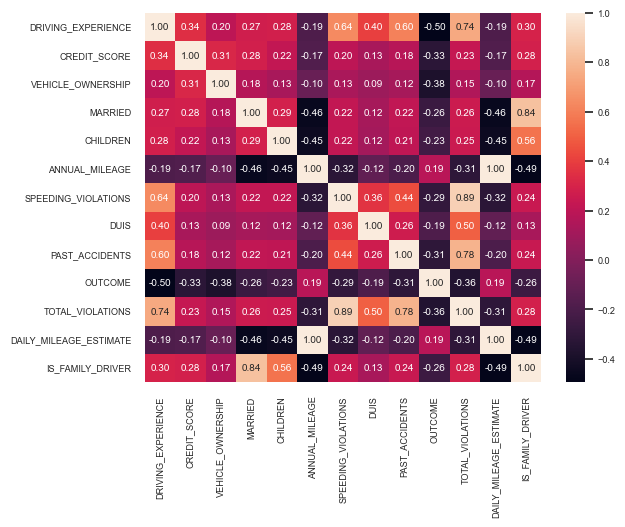

In [91]:
# Bi-Variate
sns.set(font_scale = 0.6)

sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt='.2f' )

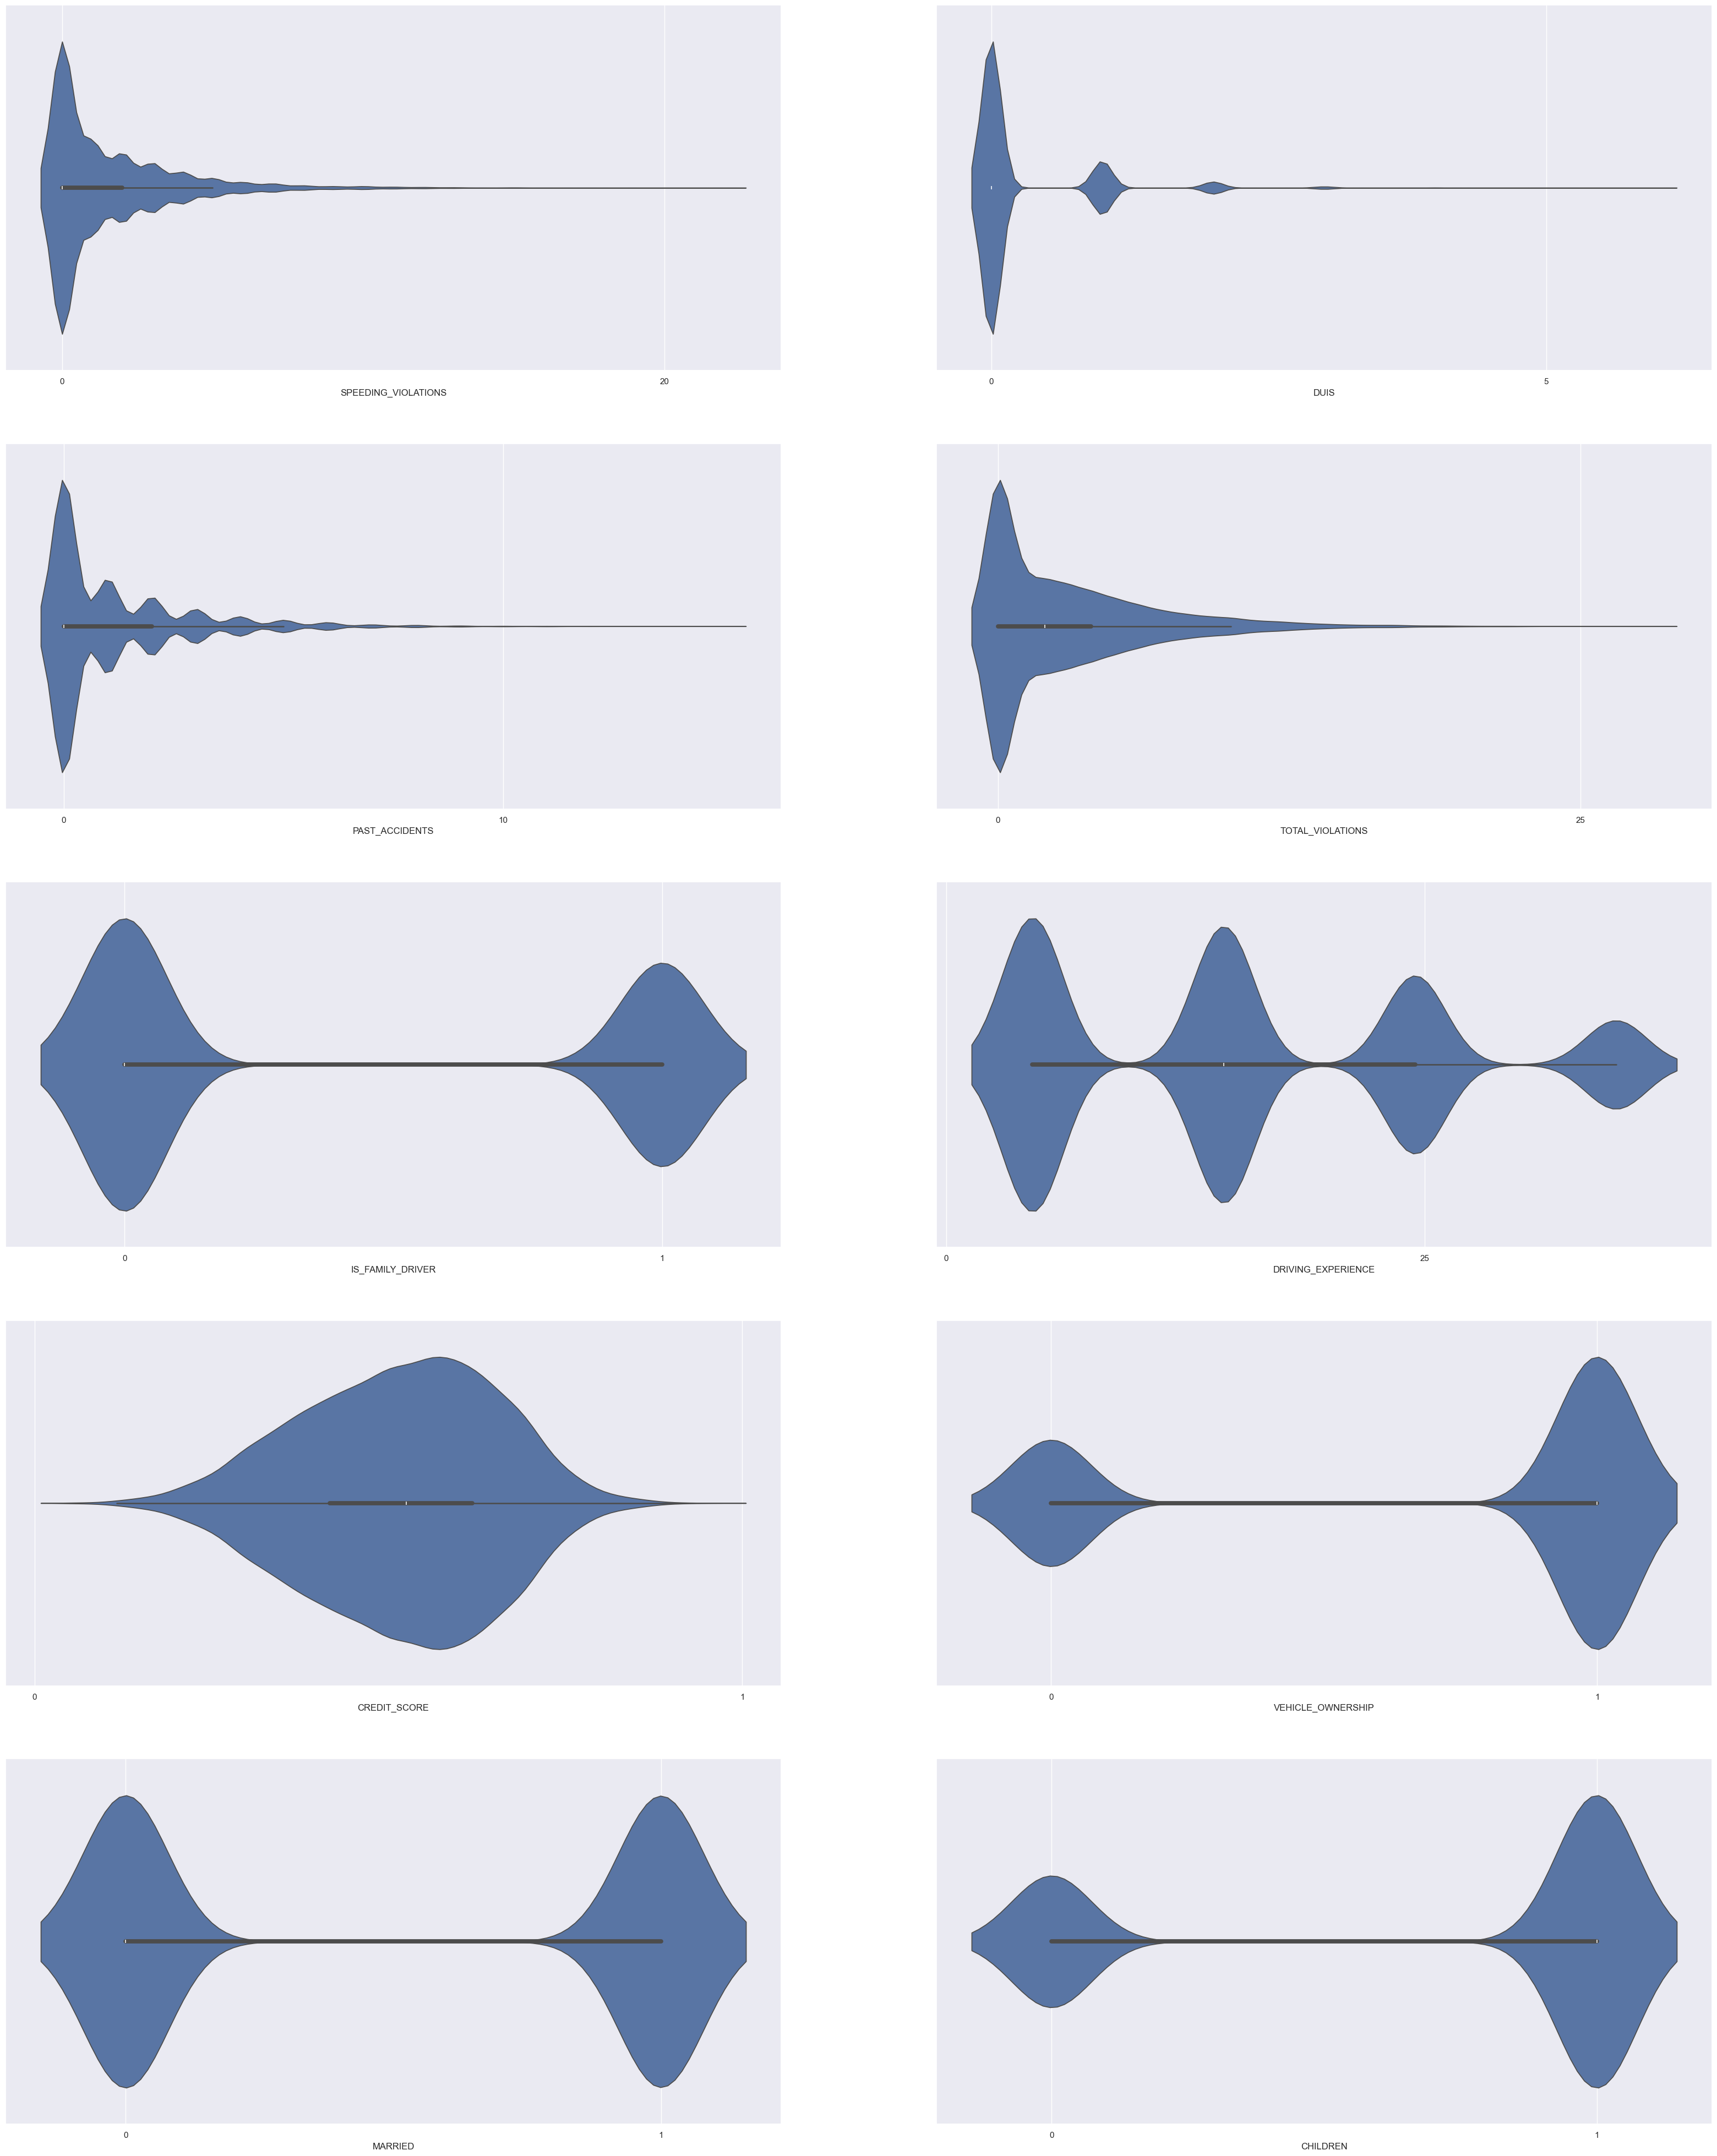

In [ ]:
# fig, axis = plt.subplots(5, 2, figsize = (40, 50))
# sns.set(font_scale = 20)
# for col, ax in zip(df.select_dtypes("int64").columns.append(df.select_dtypes("float64").columns), axis.flat[:]):
#     sns.violinplot( ax = ax ,x = df[col],)

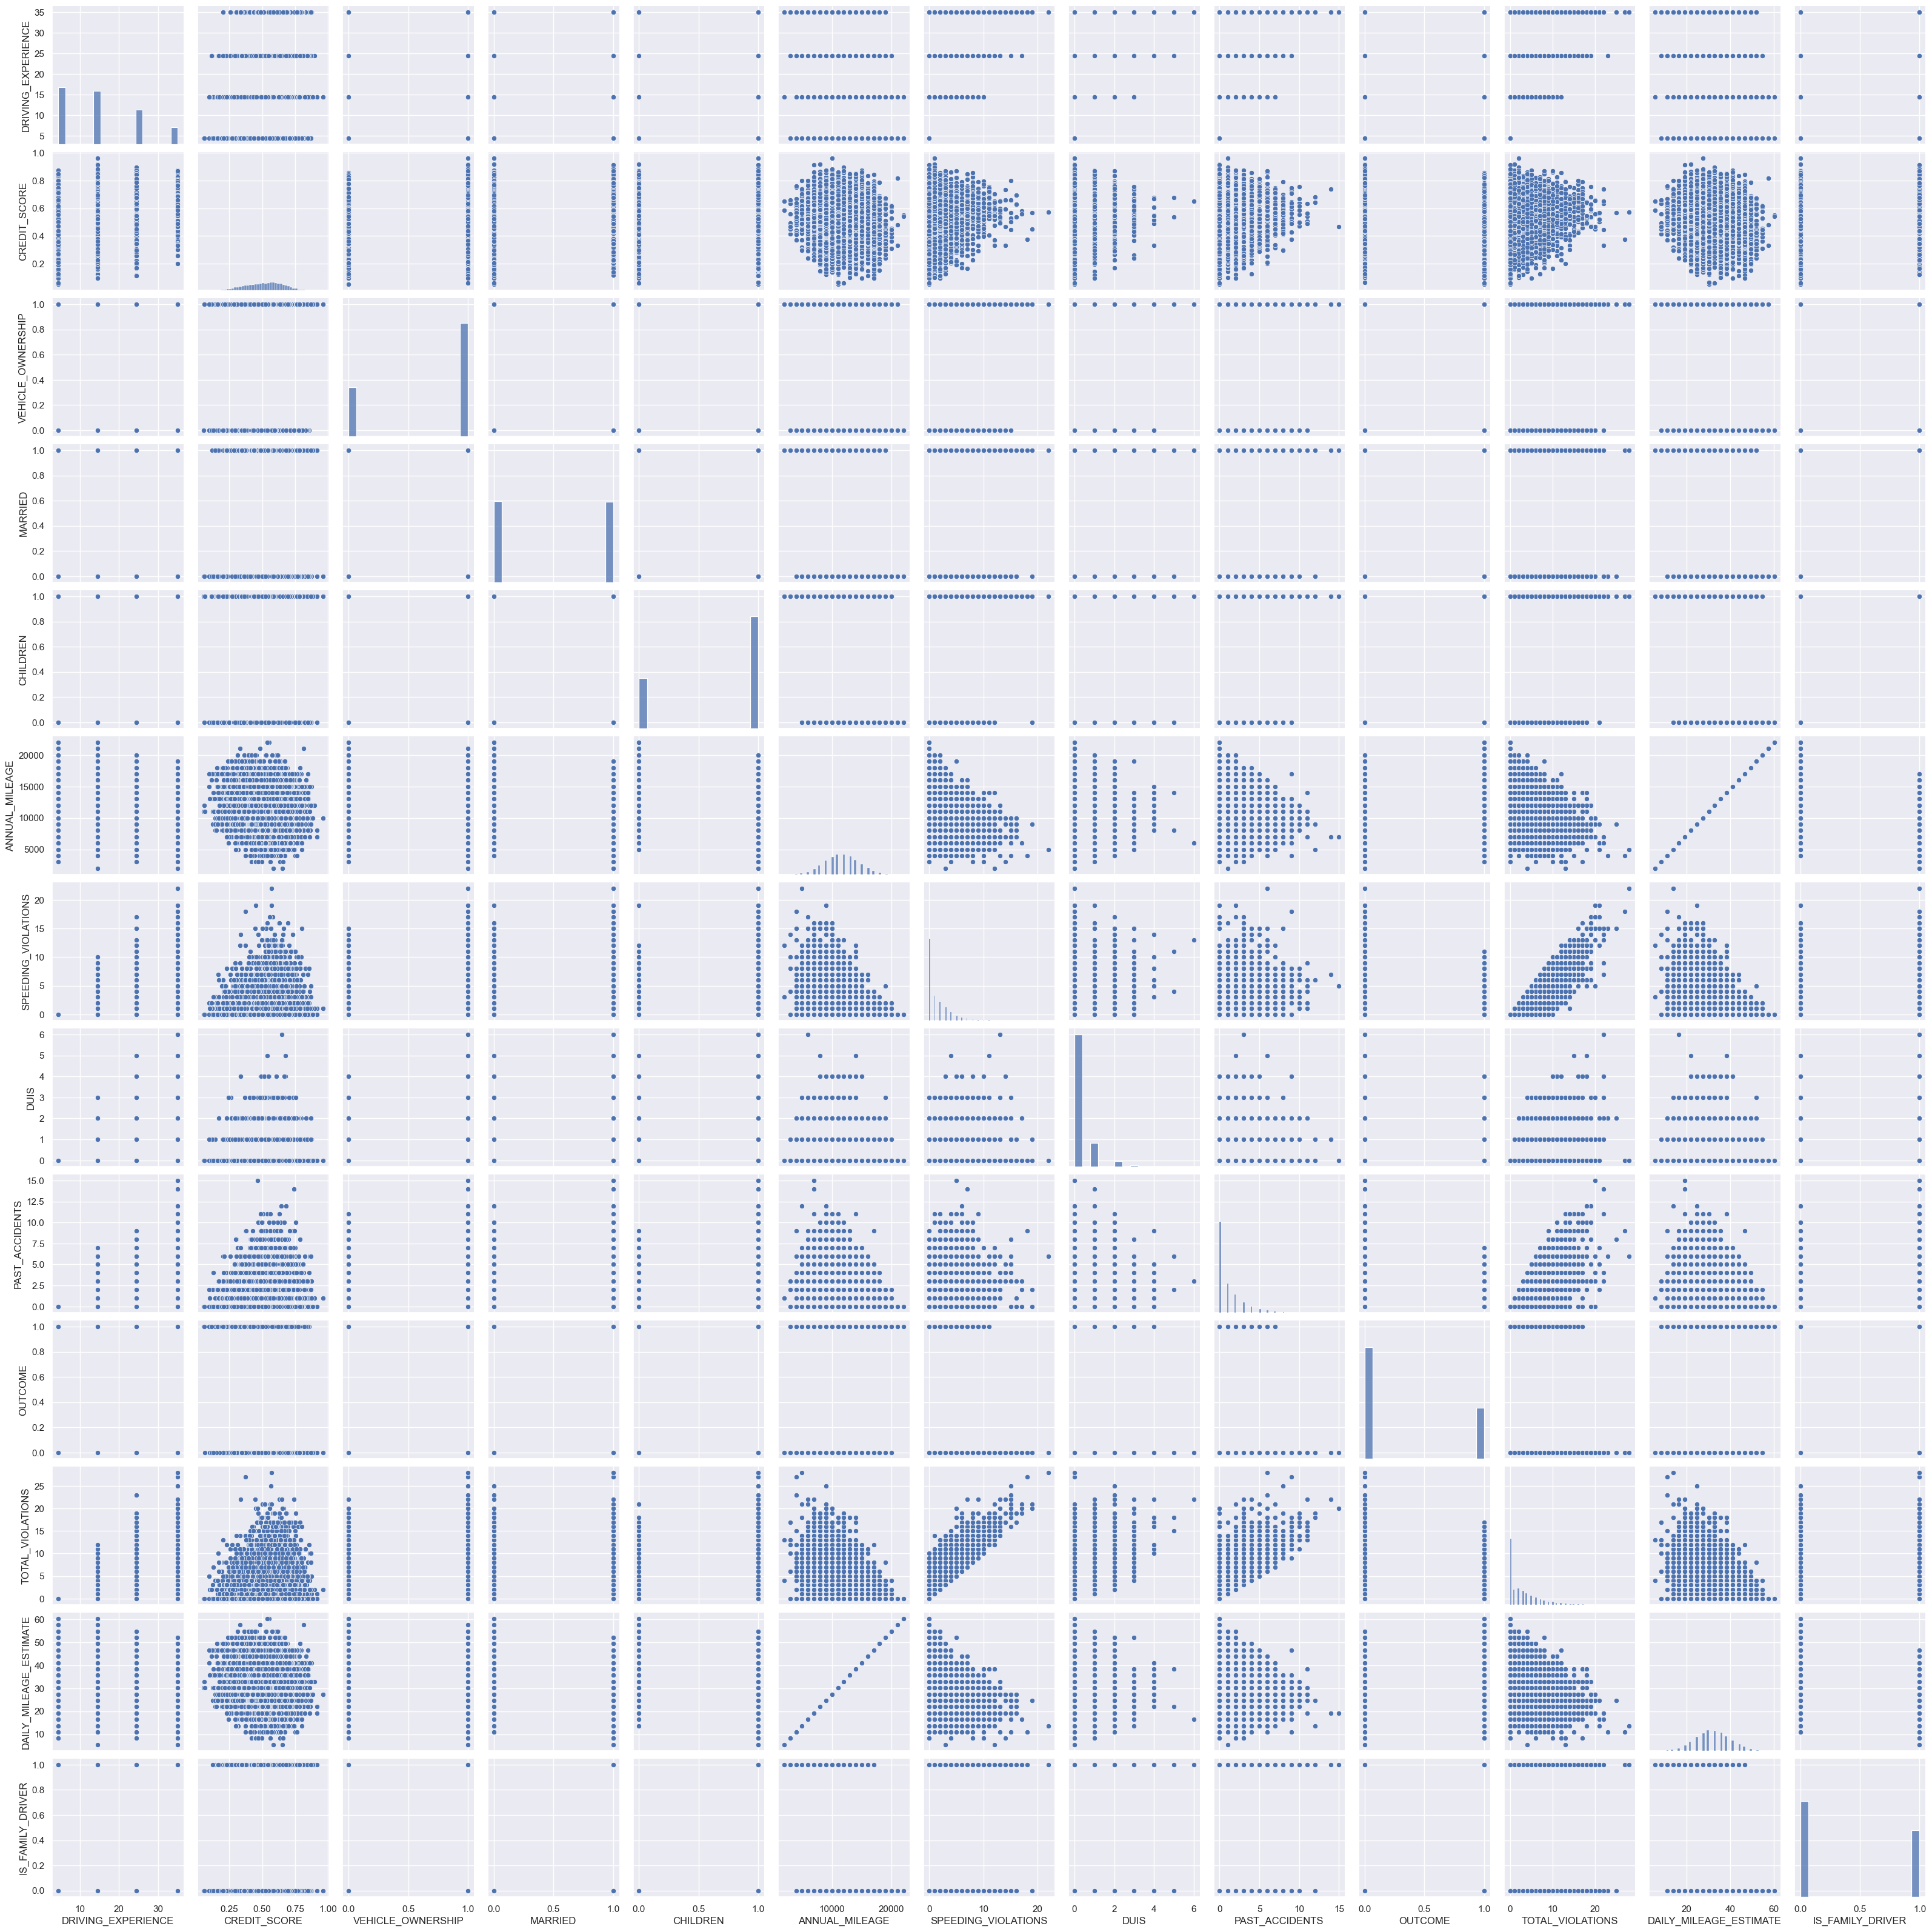

In [93]:
# MultiVariate
# sns.set(font_scale = 1)
# sns.pairplot(df.select_dtypes(include='number'))

### 3) Pre-Processing Mind Map:

* a) Detect & Handle Duplicates

* b) train_test_split

* c) Detect & Handle NaNs

* d) Detect & Handle Outliers

* e) Encoding: (Ordinal:[OrdinalEncoder, LabelEncoder] - Nominal: [< 7 uniques(OneHotEncoding), > 7 uniques (BinaryEncoder)])

* f) Imbalanced: X_train_resampled

* g) Scaling: StandardScaler, MinMaxScaler, RobustScaler: X_train_resampled_scaled

df.duplicated().sum()

In [94]:
df.duplicated().sum()

np.int64(20)

In [95]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)


In [96]:
df.duplicated().sum()

np.int64(0)

OUTCOME
0.0    6862
1.0    3118
Name: count, dtype: int64

In [98]:
def misVal(col):
    return df.iloc[df[col][df[col].isna() == True].index, : ].OUTCOME == 1.0

In [99]:
mis1 = misVal("CREDIT_SCORE")

mis1.value_counts()

OUTCOME
False    673
True     289
Name: count, dtype: int64

In [100]:
mis2 = misVal("ANNUAL_MILEAGE")
mis2.value_counts()


OUTCOME
False    633
True     319
Name: count, dtype: int64

In [101]:
itsn = (mis1[:][mis1[:] == True].index).intersection(mis2[:][mis2[:] == True].index)

In [102]:
df.iloc[itsn, : ]

AGE  GENDER      RACE  DRIVING_EXPERIENCE    EDUCATION         INCOME  \
368   16-25    male  majority                 4.5  high school        poverty   
410   26-39    male  majority                14.5         none  working class   
610   26-39    male  majority                 4.5   university   middle class   
787   16-25    male  majority                 4.5  high school   middle class   
1150  16-25  female  majority                 4.5  high school        poverty   
1606  16-25  female  majority                 4.5  high school        poverty   
2410    65+  female  majority                14.5         none   middle class   
3037  16-25  female  majority                 4.5         none        poverty   
3167  16-25    male  majority                 4.5         none        poverty   
4392  16-25  female  majority                 4.5  high school  working class   
5515  26-39    male  majority                 4.5  high school  working class   
5659  16-25    male  majority                 4.5   university        poverty   
6538  40-64    male  majority                14.5  high school    upper class   
7085    65+    male  majority                 4.5   university    upper class   
7189    65+  female  majority                 4.5   university    upper class   
7643  40-64  female  majority                14.5   university    upper class   
7703  26-39  female  majority                14.5  high school   middle class   
7908  16-25    male  majority                 4.5  high school  working class   
7989  26-39    male  majority                 4.5   university   middle class   
8156  16-25  female  majority                 4.5         none        poverty   
8501  16-25    male  majority                 4.5   university   middle class   
8913  26-39    male  majority                14.5         none   middle class   
8922  26-39  female  majority                14.5  high school  working class   
9000  26-39    male  majority                14.5  high school   middle class   
9358  26-39    male  majority                 4.5   university    upper class   
9968  26-39    male  majority                14.5  high school        poverty   

      CREDIT_SCORE  VEHICLE_OWNERSHIP VEHICLE_YEAR  MARRIED  ...  \
368            NaN                0.0  before 2015      0.0  ...   
410            NaN                1.0  before 2015      0.0  ...   
610            NaN                1.0  before 2015      1.0  ...   
787            NaN                0.0  before 2015      0.0  ...   
1150           NaN                0.0  before 2015      0.0  ...   
1606           NaN                1.0  before 2015      0.0  ...   
2410           NaN                0.0  before 2015      0.0  ...   
3037           NaN                0.0  before 2015      0.0  ...   
3167           NaN                0.0  before 2015      0.0  ...   
4392           NaN                1.0  before 2015      0.0  ...   
5515           NaN                1.0  before 2015      1.0  ...   
5659           NaN                1.0   after 2015      1.0  ...   
6538           NaN                0.0  before 2015      1.0  ...   
7085           NaN                1.0  before 2015      1.0  ...   
7189           NaN                1.0  before 2015      1.0  ...   
7643           NaN                1.0   after 2015      1.0  ...   
7703           NaN                1.0  before 2015      1.0  ...   
7908           NaN                1.0  before 2015      0.0  ...   
7989           NaN                0.0  before 2015      0.0  ...   
8156           NaN                1.0  before 2015      0.0  ...   
8501           NaN                0.0  before 2015      0.0  ...   
8913           NaN                0.0  before 2015      1.0  ...   
8922           NaN                1.0  before 2015      0.0  ...   
9000           NaN                0.0  before 2015      0.0  ...   
9358           NaN                1.0  before 2015      1.0  ...   
9968           NaN                0.0  before 2015  

In [103]:
df.drop(df.index[itsn], axis = 0, inplace = True)
df.reset_index(inplace=True, drop=True)


In [104]:
# df.info()

In [105]:
# b) train_test_split

X = df.drop(["OUTCOME"], axis=1)
y = df['OUTCOME']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7963, 20), (1991, 20), (7963,), (1991,))

In [106]:
X_train.isna().sum()

AGE                         0
GENDER                      0
RACE                        0
DRIVING_EXPERIENCE          0
EDUCATION                   0
INCOME                      0
CREDIT_SCORE              733
VEHICLE_OWNERSHIP           0
VEHICLE_YEAR                0
MARRIED                     0
CHILDREN                    0
ANNUAL_MILEAGE            731
VEHICLE_TYPE                0
SPEEDING_VIOLATIONS         0
DUIS                        0
PAST_ACCIDENTS              0
AGE_RISK_LEVEL              0
TOTAL_VIOLATIONS            0
DAILY_MILEAGE_ESTIMATE    731
IS_FAMILY_DRIVER            0
dtype: int64

In [108]:
df['OUTCOME'].value_counts()

OUTCOME
0.0    6862
1.0    3092
Name: count, dtype: int64

In [109]:
y_train.value_counts(normalize=True)

# imbalaced data

OUTCOME
0.0    0.689313
1.0    0.310687
Name: proportion, dtype: float64

In [132]:
from sklearn.base import TransformerMixin, BaseEstimator

class LogTransformer(BaseEstimator, TransformerMixin):

    # fit
    def fit(self, X, y=None):
        # self.feature_names = list(X.columns)
        self.n_features_in = X.shape[1]
        return self

    # transformer
    def transform(self, X, y=None):
        assert self.n_features_in == X.shape[1]
        # Add 1 to avoid log(0) and -inf
        return np.log(X + 1)

    # def get_feature_names_out(self, X, y=None):
    #     return self.feature_names


log_transformer = LogTransformer()
log_transformer

LogTransformer()

In [ ]:
# total_valiations , past_accidents, speeding_violations, duis   -- > right skewed , outliers

# -- > simpleimputer ,log , minmaxscaler ,  ordinalencoder

# age -- > drop  ###

# gendre,race,Education,VEHICLE_TYPE -- > labelencoder   ###


# dreiving_experience -- >  minmaxscaler  ###




# vehicle_year, AGE_RISK_LEVEL -- > ordinalencoder




# SPEEDING_VIOLATIONS -- > simpleimputer, log, RobustScaler

# PAST_ACCIDENTS -- > simpleimputer, log, RobustScaler

# DUIS -- > simpleimputer, log, RobustScaler

# TOTAL_VIOLATIONS -- > simpleimputer, log, RobustScaler




# annual_mileage -- > RobustScaler
# credit_score -- > RobustScaler
# daily_mileage_estimate -- > RobustScaler


# IS_FAMILY_DRIVER,vehicle_ownership, married , children  -- > 





### pipe line 

In [133]:

gd_race_edu_vt =Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder())
])

# edu =Pipeline(steps=[
#     ("SimpleImputer", SimpleImputer(strategy='most_frequent')),
#     ('ordinal_encoder', OrdinalEncoder())
# ])

dre = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='mean')),
    ("minmax_scaler", MinMaxScaler())
])


ve_year_age_risk = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='most_frequent')),
    ("OrdinalEncoder", OrdinalEncoder()),
])

income = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder(categories=[['poverty', 'working class', 'middle class', 'upper class']]))
])

spv_pacc_dui_tv = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='mean')),
    ("LogTransformer", LogTransformer()),
    ("RobustScaler", RobustScaler())
])

anmi_cs_dmi = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='mean')),
    ("RobustScaler", RobustScaler())
])

is_fam_veh_own_mar_chi = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='most_frequent')),
    
])

In [134]:
df.columns

Index(['GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS',
       'DUIS', 'PAST_ACCIDENTS', 'OUTCOME', 'AGE_RISK_LEVEL',
       'TOTAL_VIOLATIONS', 'DAILY_MILEAGE_ESTIMATE', 'IS_FAMILY_DRIVER'],
      dtype='object')

In [135]:
preprocessor = ColumnTransformer(
    transformers=[
        ('gd_race_edu_vt', gd_race_edu_vt, ['GENDER', 'RACE', 'EDUCATION', 'VEHICLE_TYPE']),
        ('dre', dre, ['DRIVING_EXPERIENCE']),
        ('ve_year_age_risk', ve_year_age_risk, ['VEHICLE_YEAR', 'AGE_RISK_LEVEL']),
        ('income', income, ['INCOME']),
        ('spv_pacc_dui_tv', spv_pacc_dui_tv, ['SPEEDING_VIOLATIONS', 'PAST_ACCIDENTS', 'DUIS', 'TOTAL_VIOLATIONS']),
        ('anmi_cs_dmi', anmi_cs_dmi, ['ANNUAL_MILEAGE', 'CREDIT_SCORE', 'DAILY_MILEAGE_ESTIMATE']),
        ('is_fam_veh_own_mar_chi', is_fam_veh_own_mar_chi, ['IS_FAMILY_DRIVER', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN'])
    ]
)

preprocessor 

ColumnTransformer(transformers=[('gd_race_edu_vt',
                                 Pipeline(steps=[('SimpleImputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinal_encoder',
                                                  OrdinalEncoder())]),
                                 ['GENDER', 'RACE', 'EDUCATION',
                                  'VEHICLE_TYPE']),
                                ('dre',
                                 Pipeline(steps=[('SimpleImputer',
                                                  SimpleImputer()),
                                                 ('minmax_scaler',
                                                  MinMaxScaler())]),
                                 ['DRIVING_EXPERIENCE']),
                                ('ve_year_age_risk',
                                 Pipel...
                                  'DUIS', 'TOTAL_VIOLATIONS']),
                                ('anmi_cs_dmi',
                                 Pipeline(steps=[('SimpleImputer',
                                                  SimpleImputer()),
                                                 ('RobustScaler',
                                                  RobustScaler())]),
                                 ['ANNUAL_MILEAGE', 'CREDIT_SCORE',
                                  'DAILY_MILEAGE_ESTIMATE']),
                                ('is_fam_veh_own_mar_chi',
                                 Pipeline(steps=[('SimpleImputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['IS_FAMILY_DRIVER', 'VEHICLE_OWNERSHIP',
                                  'MARRIED', 'CHILDREN'])])

In [136]:
X_train_scaled = preprocessor.fit_transform(X_train)
X_train_scaled

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 2., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [137]:
X_test_scaled = preprocessor.transform(X_test)
X_test_scaled

array([[0., 0., 2., ..., 1., 0., 1.],
       [0., 0., 2., ..., 1., 1., 1.],
       [1., 0., 0., ..., 1., 1., 1.],
       ...,
       [0., 0., 2., ..., 1., 1., 1.],
       [1., 0., 0., ..., 1., 1., 1.],
       [1., 0., 1., ..., 0., 1., 1.]])

# 4) 🚦 Modeling Workflow

---

### 1️⃣ Simple Model & Validate Performance

- Start with a baseline model (e.g., Logistic Regression).
- Evaluate using cross-validation and key metrics (accuracy, precision, recall, F1).

---

### 2️⃣ Underfitting vs Overfitting

- **Underfitting:** Model too simple, high bias.
- **Overfitting:** Model too complex, high variance.
- Use learning curves and validation scores to diagnose.

---

### 3️⃣ Hyperparameter Tuning

- Select top 5 promising models.
- Tune hyperparameters using GridSearchCV / RandomizedSearchCV / HalvingGridSearchCV.
- Optimize for F1-score (or other relevant metric).

---

### 4️⃣ Ensemble Methods (if needed)

- Combine models (Voting, Stacking, Bagging, Boosting) for improved performance.

---

### 5️⃣ Test Performance & Confidence Interval

- Evaluate final model on the test set.
- Report accuracy, precision, recall, F1, ROC-AUC, and confidence intervals.

---

### 6️⃣ Save & Deploy Model

- Save the trained model (joblib/pickle).
- Load and use in a Streamlit or Flask application for inference.

In [138]:
log_reg = LogisticRegression(random_state=42, C=1.0, max_iter=100, warm_start=True, class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42, warm_start=True)

In [140]:
log_reg.score(X_train_scaled, y_train)

0.8155217882707523

In [141]:
y_valid_pred = cross_val_predict(log_reg, X_train_scaled, y_train, cv=3)
confusion_matrix(y_true=y_train, y_pred=y_valid_pred)


array([[4410, 1079],
       [ 406, 2068]])

In [142]:
print(f"Validation Precision Score: {precision_score(y_train, y_valid_pred)}")
print(f"Validation Recall Score: {recall_score(y_train, y_valid_pred)}")
print(f"Validation f1 Score: {f1_score(y_train, y_valid_pred)}")

Validation Precision Score: 0.6571337782014617
Validation Recall Score: 0.83589329021827
Validation f1 Score: 0.735812133072407


In [143]:
y_train_pred = log_reg.predict(X_train_scaled)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")

Train Accuracy: 0.8155217882707523
Validation Accuracy: 0.8135124952907196


### Underfitting Solutions:



* 1) More Complex Model



* 2) Extract More Features (PolynomialFeatures)



* 3) descrease constrains

In [144]:

gd_race_edu_vt =Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder())
])



dre = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='mean')),
    ("minmax_scaler", MinMaxScaler())
])


ve_year_age_risk = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='most_frequent')),
    ("OrdinalEncoder", OrdinalEncoder()),
])

income = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder(categories=[['poverty', 'working class', 'middle class', 'upper class']]))
])

spv_pacc_dui_tv = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='mean')),
    ("LogTransformer", LogTransformer()),
    ("RobustScaler", RobustScaler())
])

anmi_cs_dmi = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='mean')),
    ('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ("RobustScaler", RobustScaler())
])

is_fam_veh_own_mar_chi = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='most_frequent')),
    
])

preprocessor = ColumnTransformer(
    transformers=[
        ('gd_race_edu_vt', gd_race_edu_vt, ['GENDER', 'RACE', 'EDUCATION', 'VEHICLE_TYPE']),
        ('dre', dre, ['DRIVING_EXPERIENCE']),
        ('ve_year_age_risk', ve_year_age_risk, ['VEHICLE_YEAR', 'AGE_RISK_LEVEL']),
        ('income', income, ['INCOME']),
        ('spv_pacc_dui_tv', spv_pacc_dui_tv, ['SPEEDING_VIOLATIONS', 'PAST_ACCIDENTS', 'DUIS', 'TOTAL_VIOLATIONS']),
        ('anmi_cs_dmi', anmi_cs_dmi, ['ANNUAL_MILEAGE', 'CREDIT_SCORE', 'DAILY_MILEAGE_ESTIMATE']),
        ('is_fam_veh_own_mar_chi', is_fam_veh_own_mar_chi, ['IS_FAMILY_DRIVER', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN'])
    ]
)



X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.fit_transform(X_test)

In [145]:
log_reg = LogisticRegression(random_state=42, C=1.0, max_iter=1000, warm_start=False, class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)
y_train_pred = log_reg.predict(X_train_scaled) # train
y_valid_pred = cross_val_predict(log_reg, X_train_scaled, y_train, cv=3) # valid
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")

Train Accuracy: 0.8160241115157604
Validation Accuracy: 0.8145171417807359


### 🚀 Try Complex Models

---

In this section, we experiment with more complex machine learning models to improve prediction performance. We leverage advanced algorithms and ensemble techniques, including:

- **Support Vector Machines (SVM)**
- **Random Forests**
- **AdaBoost**
- **Stacking & Voting Ensembles**

Each model is tuned using cross-validation and grid/randomized search for optimal hyperparameters. We also address class imbalance using techniques like **SMOTE** and compare results using key metrics (accuracy, precision, recall, F1-score).

---

In [146]:

gd_race_edu_vt =Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder())
])



dre = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='mean')),
    ("minmax_scaler", MinMaxScaler())
])


ve_year_age_risk = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='most_frequent')),
    ("OrdinalEncoder", OrdinalEncoder()),
])

income = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder(categories=[['poverty', 'working class', 'middle class', 'upper class']]))
])

spv_pacc_dui_tv = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='mean')),
    ("LogTransformer", LogTransformer()),
    ("RobustScaler", RobustScaler())
])

anmi_cs_dmi = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='mean')),
    #('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ("RobustScaler", RobustScaler())
])

is_fam_veh_own_mar_chi = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='most_frequent')),
    
])

preprocessor = ColumnTransformer(
    transformers=[
        ('gd_race_edu_vt', gd_race_edu_vt, ['GENDER', 'RACE', 'EDUCATION', 'VEHICLE_TYPE']),
        ('dre', dre, ['DRIVING_EXPERIENCE']),
        ('ve_year_age_risk', ve_year_age_risk, ['VEHICLE_YEAR', 'AGE_RISK_LEVEL']),
        ('income', income, ['INCOME']),
        ('spv_pacc_dui_tv', spv_pacc_dui_tv, ['SPEEDING_VIOLATIONS', 'PAST_ACCIDENTS', 'DUIS', 'TOTAL_VIOLATIONS']),
        ('anmi_cs_dmi', anmi_cs_dmi, ['ANNUAL_MILEAGE', 'CREDIT_SCORE', 'DAILY_MILEAGE_ESTIMATE']),
        ('is_fam_veh_own_mar_chi', is_fam_veh_own_mar_chi, ['IS_FAMILY_DRIVER', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN'])
    ]
)



X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.fit_transform(X_test)

In [148]:
linear_svc_clf = LinearSVC(C=1, random_state=42, max_iter=1000000, class_weight='balanced', loss='hinge')
linear_svc_clf.fit(X_train_scaled, y_train)
y_train_pred = linear_svc_clf.predict(X_train_scaled) # train
y_valid_pred = cross_val_predict(linear_svc_clf, X_train_scaled, y_train, cv=3) # valid
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")

Train Accuracy: 0.8272008037171921
Validation Accuracy: 0.8231822177571267


In [149]:
svc_clf = SVC(C=1, kernel='poly', degree=3, coef0=10, random_state=42, class_weight='balanced')
svc_clf.fit(X_train_scaled, y_train)
y_train_pred = svc_clf.predict(X_train_scaled) # train
y_valid_pred = cross_val_predict(svc_clf, X_train_scaled, y_train, cv=3) # valid
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Validation Accuracy: {accuracy_score(y_train, y_valid_pred)}")


Train Accuracy: 0.8323496169785257
Validation Accuracy: 0.8175310812507849


# 🏋️‍♂️ Let's Solve Imbalanced Data

---

There are two main strategies to address class imbalance in machine learning datasets:

1. **Undersampling**  
    Reduce the number of samples in the majority class to match the minority class.

2. **Oversampling**  
    Increase the number of samples in the minority class (e.g., using SMOTE or RandomOverSampler).

---

> ⚖️ **Goal:**  
> Achieve a balanced dataset for fair and robust model training.

### 1) 🟦 Undersampling

Undersampling is a technique to address class imbalance by reducing the number of samples in the majority class, so both classes have similar representation. This helps prevent the model from being biased toward the majority class.

**Key Points:**
- Randomly removes samples from the majority class.
- Can be combined with preprocessing and feature engineering pipelines.
- Useful when the dataset is large and the minority class is underrepresented.

**Workflow Example:**

In [150]:

gd_race_edu_vt =Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder())
])



dre = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='mean')),
    ("minmax_scaler", MinMaxScaler())
])


ve_year_age_risk = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='most_frequent')),
    ("OrdinalEncoder", OrdinalEncoder()),
])

income = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder(categories=[['poverty', 'working class', 'middle class', 'upper class']]))
])

spv_pacc_dui_tv = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='mean')),
    ("LogTransformer", LogTransformer()),
    ("RobustScaler", RobustScaler())
])

anmi_cs_dmi = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='mean')),
    ('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ("RobustScaler", RobustScaler())
])

is_fam_veh_own_mar_chi = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='most_frequent')),
    
])

poly_preprocessor = ColumnTransformer(
    transformers=[
        ('gd_race_edu_vt', gd_race_edu_vt, ['GENDER', 'RACE', 'EDUCATION', 'VEHICLE_TYPE']),
        ('dre', dre, ['DRIVING_EXPERIENCE']),
        ('ve_year_age_risk', ve_year_age_risk, ['VEHICLE_YEAR', 'AGE_RISK_LEVEL']),
        ('income', income, ['INCOME']),
        ('spv_pacc_dui_tv', spv_pacc_dui_tv, ['SPEEDING_VIOLATIONS', 'PAST_ACCIDENTS', 'DUIS', 'TOTAL_VIOLATIONS']),
        ('anmi_cs_dmi', anmi_cs_dmi, ['ANNUAL_MILEAGE', 'CREDIT_SCORE', 'DAILY_MILEAGE_ESTIMATE']),
        ('is_fam_veh_own_mar_chi', is_fam_veh_own_mar_chi, ['IS_FAMILY_DRIVER', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN'])
    ]
)



# X_train_scaled = preprocessor.fit_transform(X_train)
# X_test_scaled = preprocessor.fit_transform(X_test)

In [151]:
from imblearn.pipeline import Pipeline as Imb_Pipeline

undersampling_polyfeats_pipeline = Imb_Pipeline(steps=[
    ('poly_preprocessor', poly_preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
])

undersampling_polyfeats_pipeline

Pipeline(steps=[('poly_preprocessor',
                 ColumnTransformer(transformers=[('gd_race_edu_vt',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['GENDER', 'RACE',
                                                   'EDUCATION',
                                                   'VEHICLE_TYPE']),
                                                 ('dre',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer()),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['DRIVING_EX...
                                                                   PolynomialFeatures(degree=5,
                                                                                      include_bias=False)),
                                                                  ('RobustScaler',
                                                                   RobustScaler())]),
                                                  ['ANNUAL_MILEAGE',
                                                   'CREDIT_SCORE',
                                                   'DAILY_MILEAGE_ESTIMATE']),
                                                 ('is_fam_veh_own_mar_chi',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['IS_FAMILY_DRIVER',
                                                   'VEHICLE_OWNERSHIP',
                                                   'MARRIED', 'CHILDREN'])])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42))])

In [152]:

gd_race_edu_vt =Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder())
])



dre = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='mean')),
    ("minmax_scaler", MinMaxScaler())
])


ve_year_age_risk = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='most_frequent')),
    ("OrdinalEncoder", OrdinalEncoder()),
])

income = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder(categories=[['poverty', 'working class', 'middle class', 'upper class']]))
])

spv_pacc_dui_tv = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='mean')),
    ("LogTransformer", LogTransformer()),
    ("RobustScaler", RobustScaler())
])

anmi_cs_dmi = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='mean')),
    #('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ("RobustScaler", RobustScaler())
])

is_fam_veh_own_mar_chi = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='most_frequent')),
    
])

preprocessor = ColumnTransformer(
    transformers=[
        ('gd_race_edu_vt', gd_race_edu_vt, ['GENDER', 'RACE', 'EDUCATION', 'VEHICLE_TYPE']),
        ('dre', dre, ['DRIVING_EXPERIENCE']),
        ('ve_year_age_risk', ve_year_age_risk, ['VEHICLE_YEAR', 'AGE_RISK_LEVEL']),
        ('income', income, ['INCOME']),
        ('spv_pacc_dui_tv', spv_pacc_dui_tv, ['SPEEDING_VIOLATIONS', 'PAST_ACCIDENTS', 'DUIS', 'TOTAL_VIOLATIONS']),
        ('anmi_cs_dmi', anmi_cs_dmi, ['ANNUAL_MILEAGE', 'CREDIT_SCORE', 'DAILY_MILEAGE_ESTIMATE']),
        ('is_fam_veh_own_mar_chi', is_fam_veh_own_mar_chi, ['IS_FAMILY_DRIVER', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN'])
    ]
)



# X_train_scaled = preprocessor.fit_transform(X_train)
# X_test_scaled = preprocessor.fit_transform(X_test)


from imblearn.pipeline import Pipeline as Imb_Pipeline

undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
])

undersampling_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('gd_race_edu_vt',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['GENDER', 'RACE',
                                                   'EDUCATION',
                                                   'VEHICLE_TYPE']),
                                                 ('dre',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer()),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['DRIVING_EXPERIE...
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer()),
                                                                  ('RobustScaler',
                                                                   RobustScaler())]),
                                                  ['ANNUAL_MILEAGE',
                                                   'CREDIT_SCORE',
                                                   'DAILY_MILEAGE_ESTIMATE']),
                                                 ('is_fam_veh_own_mar_chi',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['IS_FAMILY_DRIVER',
                                                   'VEHICLE_OWNERSHIP',
                                                   'MARRIED', 'CHILDREN'])])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42))])

# 2) Underfitting vs Overfitting

---

> **Underfitting**: Model is too simple, fails to capture underlying patterns (high bias).  
> **Overfitting**: Model is too complex, captures noise as if it were signal (high variance).

---

### 🔎 Key Insight

We now know the dataset is **not linearly separable**.

---

### 👉 Next Steps

Let's try more flexible models:

- **KNN**
- **GaussianNB**
- **SVC**
- **Decision Tree**
- **Ensemble Methods**

*These models can capture non-linear relationships and may improve performance!*

In [153]:
# Logestic Regression



from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

undersampling_pipeline = Imb_Pipeline(steps=[
    ('poly_preprocessor', poly_preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", LogisticRegression(C=1.0, max_iter=500, random_state=42))
    ])
undersampling_pipeline.fit(X_train, y_train)
y_train_pred = undersampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()
    
    undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", LogisticRegression(C=1.0, max_iter=500, random_state=42))
    ])

    undersampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = undersampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.8169031771945247
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8098718640282392
Average Valid F1 Score: 0.7325850486340358
Average Valid Precsion: 0.6507364862854297
Average Valid Recall: 0.8383249499038973


In [154]:
# KNN

from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=77, leaf_size=50))
    ])
undersampling_pipeline.fit(X_train, y_train)
y_train_pred = undersampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()
    
    undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=77, leaf_size=50))
    ])

    undersampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = undersampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.7831219389677258
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.784001693968903
Average Valid F1 Score: 0.7001600077511982
Average Valid Precsion: 0.6159247993500433
Average Valid Recall: 0.811635382161698


In [155]:
# GaussianNB



from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", GaussianNB())
    ])
undersampling_pipeline.fit(X_train, y_train)
y_train_pred = undersampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()
    
    undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", GaussianNB())
    ])

    undersampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = undersampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.7674243375612206
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.768430665568899
Average Valid F1 Score: 0.6835199406538752
Average Valid Precsion: 0.5942759307054594
Average Valid Recall: 0.8047724205618942


In [156]:
# SVC



from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", SVC(C=1.0, kernel='poly', degree=4, coef0=10, random_state=42))
    ])
undersampling_pipeline.fit(X_train, y_train)
y_train_pred = undersampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()
    
    undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", SVC(C=1.0, kernel='poly', degree=4, coef0=10, random_state=42))
    ])

    undersampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = undersampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.8354891372598267
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7929183740422137
Average Valid F1 Score: 0.7118114709815052
Average Valid Precsion: 0.6272282154018584
Average Valid Recall: 0.8229599640125956


In [157]:
# DT

from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", DecisionTreeClassifier(max_depth=5, random_state=42, min_samples_split=20, min_samples_leaf=10))
    ])
undersampling_pipeline.fit(X_train, y_train)
y_train_pred = undersampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()
    
    undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", DecisionTreeClassifier(max_depth=5, random_state=42, min_samples_split=20, min_samples_leaf=10))
    ])

    undersampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = undersampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.8192892126083134
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8177824937619673
Average Valid F1 Score: 0.735440404618909
Average Valid Precsion: 0.670508954324551
Average Valid Recall: 0.8148767022451233


In [159]:
undersampling_polyfeats_pipeline.steps

[('poly_preprocessor',
  ColumnTransformer(transformers=[('gd_race_edu_vt',
                                   Pipeline(steps=[('SimpleImputer',
                                                    SimpleImputer(strategy='most_frequent')),
                                                   ('ordinal_encoder',
                                                    OrdinalEncoder())]),
                                   ['GENDER', 'RACE', 'EDUCATION',
                                    'VEHICLE_TYPE']),
                                  ('dre',
                                   Pipeline(steps=[('SimpleImputer',
                                                    SimpleImputer()),
                                                   ('minmax_scaler',
                                                    MinMaxScaler())]),
                                   ['DRIVING_EXPERIENCE']),
                                  ('ve_year_age_risk',
                                   Pipel...
                

# 3) 🔍 GridSearchCV

---

GridSearchCV is a powerful tool for hyperparameter tuning in machine learning. It systematically searches through combinations of parameters, using cross-validation to find the best set for your model.

**Key Steps:**
- Define a parameter grid for the model.
- Use `GridSearchCV` or `HalvingGridSearchCV` for efficient search.
- Fit on training data, validate on folds, and select the best estimator.

**Example Workflow:**

In [160]:
# Logestic Regression

from sklearn.model_selection import KFold
params_grid = {
    'model__penalty': [ 'l2'],  # Regularization type
    'model__C': [0.1, 1.0, 5.0],
    'poly_preprocessor__anmi_cs_dmi__poly__degree': [2, 3, 4, 5], # Polynomial degree


}

undersampling_pipeline = Imb_Pipeline(steps=[
    ('poly_preprocessor', poly_preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", LogisticRegression(C=1.0, max_iter=1000, random_state=42)) # 135 Model
    ])

logestic_grid = GridSearchCV(undersampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1') # 405 Model

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 2025 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()

    logestic_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx]) # 405 Model
    best_logestic_model = logestic_grid.best_estimator_
    y_valid_pred = logestic_grid.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8103742977284414
Average Valid F1 Score: 0.7337687862409312
Average Valid Precsion: 0.6508229507973378
Average Valid Recall: 0.8411515969410706


In [161]:
best_logestic_model

Pipeline(steps=[('poly_preprocessor',
                 ColumnTransformer(transformers=[('gd_race_edu_vt',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['GENDER', 'RACE',
                                                   'EDUCATION',
                                                   'VEHICLE_TYPE']),
                                                 ('dre',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer()),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['DRIVING_EX...
                                                  ['ANNUAL_MILEAGE',
                                                   'CREDIT_SCORE',
                                                   'DAILY_MILEAGE_ESTIMATE']),
                                                 ('is_fam_veh_own_mar_chi',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['IS_FAMILY_DRIVER',
                                                   'VEHICLE_OWNERSHIP',
                                                   'MARRIED', 'CHILDREN'])])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model',
                 LogisticRegression(C=5.0, max_iter=1000, random_state=42))])

In [162]:
logestic_grid.best_params_

{'model__C': 5.0,
 'model__penalty': 'l2',
 'poly_preprocessor__anmi_cs_dmi__poly__degree': 4}

In [163]:
logestic_grid

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('poly_preprocessor',
                                        ColumnTransformer(transformers=[('gd_race_edu_vt',
                                                                         Pipeline(steps=[('SimpleImputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ordinal_encoder',
                                                                                          OrdinalEncoder())]),
                                                                         ['GENDER',
                                                                          'RACE',
                                                                          'EDUCATION',
                                                                          'VEHICLE_TYPE']),
                                                                        ('dre',
                                                                         Pipeline(steps=[('SimpleImputer',
                                                                                          SimpleImputer()),
                                                                                         ('minmax_scaler',
                                                                                          Mi...
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['IS_FAMILY_DRIVER',
                                                                          'VEHICLE_OWNERSHIP',
                                                                          'MARRIED',
                                                                          'CHILDREN'])])),
                                       ('solve_imbalanced',
                                        RandomUnderSampler(random_state=42)),
                                       ('model',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'model__C': [0.1, 1.0, 5.0], 'model__penalty': ['l2'],
                         'poly_preprocessor__anmi_cs_dmi__poly__degree': [2, 3,
                                                                          4,
                                                                          5]},
             scoring='f1')

In [164]:
best_logestic_model.fit(X_train, y_train)

Pipeline(steps=[('poly_preprocessor',
                 ColumnTransformer(transformers=[('gd_race_edu_vt',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['GENDER', 'RACE',
                                                   'EDUCATION',
                                                   'VEHICLE_TYPE']),
                                                 ('dre',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer()),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['DRIVING_EX...
                                                  ['ANNUAL_MILEAGE',
                                                   'CREDIT_SCORE',
                                                   'DAILY_MILEAGE_ESTIMATE']),
                                                 ('is_fam_veh_own_mar_chi',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['IS_FAMILY_DRIVER',
                                                   'VEHICLE_OWNERSHIP',
                                                   'MARRIED', 'CHILDREN'])])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model',
                 LogisticRegression(C=5.0, max_iter=1000, random_state=42))])

In [165]:
# KNN

from sklearn.model_selection import KFold
params_grid = {'model__n_neighbors': [21, 31, 51, 71, 101],
               'model__leaf_size':[30, 40, 50, 60, 80, 100],
               }



undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=77, leaf_size=50)) # 135 Model
    ])

knn_grid = GridSearchCV(undersampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1') # 405 Model

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 2025 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()

    knn_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx]) # 405 Model
    best_knn_model = knn_grid.best_estimator_
    y_valid_pred = knn_grid.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7841282684609487
Average Valid F1 Score: 0.7035952152501701
Average Valid Precsion: 0.6139989154917789
Average Valid Recall: 0.8241696315380527


In [166]:
best_knn_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('gd_race_edu_vt',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['GENDER', 'RACE',
                                                   'EDUCATION',
                                                   'VEHICLE_TYPE']),
                                                 ('dre',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer()),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['DRIVING_EXPERIE...
                                                                   RobustScaler())]),
                                                  ['ANNUAL_MILEAGE',
                                                   'CREDIT_SCORE',
                                                   'DAILY_MILEAGE_ESTIMATE']),
                                                 ('is_fam_veh_own_mar_chi',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['IS_FAMILY_DRIVER',
                                                   'VEHICLE_OWNERSHIP',
                                                   'MARRIED', 'CHILDREN'])])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model', KNeighborsClassifier(n_neighbors=21))])

In [167]:
knn_grid.best_params_

{'model__leaf_size': 30, 'model__n_neighbors': 21}

In [168]:
knn_grid

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('gd_race_edu_vt',
                                                                         Pipeline(steps=[('SimpleImputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ordinal_encoder',
                                                                                          OrdinalEncoder())]),
                                                                         ['GENDER',
                                                                          'RACE',
                                                                          'EDUCATION',
                                                                          'VEHICLE_TYPE']),
                                                                        ('dre',
                                                                         Pipeline(steps=[('SimpleImputer',
                                                                                          SimpleImputer()),
                                                                                         ('minmax_scaler',
                                                                                          MinMaxS...
                                                                         Pipeline(steps=[('SimpleImputer',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['IS_FAMILY_DRIVER',
                                                                          'VEHICLE_OWNERSHIP',
                                                                          'MARRIED',
                                                                          'CHILDREN'])])),
                                       ('solve_imbalanced',
                                        RandomUnderSampler(random_state=42)),
                                       ('model',
                                        KNeighborsClassifier(leaf_size=50,
                                                             n_neighbors=77))]),
             n_jobs=-1,
             param_grid={'model__leaf_size': [30, 40, 50, 60, 80, 100],
                         'model__n_neighbors': [21, 31, 51, 71, 101]},
             scoring='f1')

In [169]:
best_knn_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('gd_race_edu_vt',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['GENDER', 'RACE',
                                                   'EDUCATION',
                                                   'VEHICLE_TYPE']),
                                                 ('dre',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer()),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['DRIVING_EXPERIE...
                                                                   RobustScaler())]),
                                                  ['ANNUAL_MILEAGE',
                                                   'CREDIT_SCORE',
                                                   'DAILY_MILEAGE_ESTIMATE']),
                                                 ('is_fam_veh_own_mar_chi',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['IS_FAMILY_DRIVER',
                                                   'VEHICLE_OWNERSHIP',
                                                   'MARRIED', 'CHILDREN'])])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model', KNeighborsClassifier(n_neighbors=21))])

In [170]:
# SVC

from sklearn.model_selection import KFold
params_grid = [{'model__C': [1, 20, 50],
               'model__kernel':['poly'],
               'model__degree':[2, 3, 4, 5, 7],
               'model__coef0':[5, 10],
               },
               {'model__C': [1, 20, 50],
               'model__kernel':['rbf'],
               'model__gamma':['scale', 0.1, 0.5, 0.8, 1],
               }
              ]



undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", SVC(C=1.0, kernel='poly', degree=4, coef0=10, random_state=42)) 
    ])

svm_clf_grid = HalvingGridSearchCV(undersampling_pipeline, params_grid, cv=3, n_jobs=-1, random_state=42, scoring='f1')

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train):
    print(f"At fold {i}")


    svm_clf_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx]) 
    best_svm_clf_model = svm_clf_grid.best_estimator_
    y_valid_pred = svm_clf_grid.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8200434059815713
Average Valid F1 Score: 0.7420807336005713
Average Valid Precsion: 0.6691795600690984
Average Valid Recall: 0.8330666993824888


In [171]:
best_svm_clf_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('gd_race_edu_vt',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['GENDER', 'RACE',
                                                   'EDUCATION',
                                                   'VEHICLE_TYPE']),
                                                 ('dre',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer()),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['DRIVING_EXPERIE...
                                                  ['ANNUAL_MILEAGE',
                                                   'CREDIT_SCORE',
                                                   'DAILY_MILEAGE_ESTIMATE']),
                                                 ('is_fam_veh_own_mar_chi',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['IS_FAMILY_DRIVER',
                                                   'VEHICLE_OWNERSHIP',
                                                   'MARRIED', 'CHILDREN'])])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model',
                 SVC(C=1, coef0=10, degree=2, kernel='poly', random_state=42))])

In [172]:
svm_clf_grid.best_params_

{'model__C': 1,
 'model__coef0': 10,
 'model__degree': 2,
 'model__kernel': 'poly'}

In [173]:
best_svm_clf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('gd_race_edu_vt',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['GENDER', 'RACE',
                                                   'EDUCATION',
                                                   'VEHICLE_TYPE']),
                                                 ('dre',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer()),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['DRIVING_EXPERIE...
                                                  ['ANNUAL_MILEAGE',
                                                   'CREDIT_SCORE',
                                                   'DAILY_MILEAGE_ESTIMATE']),
                                                 ('is_fam_veh_own_mar_chi',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['IS_FAMILY_DRIVER',
                                                   'VEHICLE_OWNERSHIP',
                                                   'MARRIED', 'CHILDREN'])])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model',
                 SVC(C=1, coef0=10, degree=2, kernel='poly', random_state=42))])

In [174]:
# DT

from sklearn.model_selection import KFold
params_grid = {'model__max_depth': [3, 5, 7, 10, 20],
               'model__max_leaf_nodes':[5, 10, 20],
               'model__min_samples_split':[20, 25, 30],
               'model__min_samples_leaf':[10, 20, 30],
               }



undersampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", DecisionTreeClassifier(max_depth=5, max_leaf_nodes=5, random_state=42, min_samples_split=20, min_samples_leaf=10)) # 135 Model
    ])

dt_clf_grid = GridSearchCV(undersampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1') # 405 Model

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 2025 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()

    dt_clf_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx]) # 405 Model
    best_dt_clf_model = dt_clf_grid.best_estimator_
    y_valid_pred = dt_clf_grid.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8220522732936498
Average Valid F1 Score: 0.7409521023145095
Average Valid Precsion: 0.6776867766425572
Average Valid Recall: 0.8181139328507749


In [175]:
best_dt_clf_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('gd_race_edu_vt',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['GENDER', 'RACE',
                                                   'EDUCATION',
                                                   'VEHICLE_TYPE']),
                                                 ('dre',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer()),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['DRIVING_EXPERIE...
                                                   'DAILY_MILEAGE_ESTIMATE']),
                                                 ('is_fam_veh_own_mar_chi',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['IS_FAMILY_DRIVER',
                                                   'VEHICLE_OWNERSHIP',
                                                   'MARRIED', 'CHILDREN'])])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model',
                 DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                                        min_samples_leaf=10,
                                        min_samples_split=20,
                                        random_state=42))])

In [176]:
dt_clf_grid.best_params_

{'model__max_depth': 5,
 'model__max_leaf_nodes': 10,
 'model__min_samples_leaf': 10,
 'model__min_samples_split': 20}

In [177]:
best_dt_clf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('gd_race_edu_vt',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['GENDER', 'RACE',
                                                   'EDUCATION',
                                                   'VEHICLE_TYPE']),
                                                 ('dre',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer()),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['DRIVING_EXPERIE...
                                                   'DAILY_MILEAGE_ESTIMATE']),
                                                 ('is_fam_veh_own_mar_chi',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['IS_FAMILY_DRIVER',
                                                   'VEHICLE_OWNERSHIP',
                                                   'MARRIED', 'CHILDREN'])])),
                ('solve_imbalanced', RandomUnderSampler(random_state=42)),
                ('model',
                 DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                                        min_samples_leaf=10,
                                        min_samples_split=20,
                                        random_state=42))])

# b) Oversampling

---

Oversampling is a technique to address class imbalance by increasing the number of samples in the minority class, often using synthetic data generation methods like **SMOTE**.

**Key Points:**
- Generates new synthetic samples for the minority class.
- Helps the model learn from underrepresented classes.
- Can be combined with preprocessing and feature engineering pipelines.

---

**Workflow Example:**

1. **Preprocessing:** Handle missing values, encode categorical variables, and scale features.
2. **Oversampling:** Apply SMOTE or RandomOverSampler to balance the classes.
3. **Model Training:** Train your model on the balanced dataset.

> ⚖️ **Goal:**  
> Achieve a balanced dataset for fair and robust model training.

In [178]:

gd_race_edu_vt =Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder())
])



dre = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='mean')),
    ("minmax_scaler", MinMaxScaler())
])


ve_year_age_risk = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='most_frequent')),
    ("OrdinalEncoder", OrdinalEncoder()),
])

income = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder(categories=[['poverty', 'working class', 'middle class', 'upper class']]))
])

spv_pacc_dui_tv = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='mean')),
    ("LogTransformer", LogTransformer()),
    ("RobustScaler", RobustScaler())
])

anmi_cs_dmi = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='mean')),
    ('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ("RobustScaler", RobustScaler())
])

is_fam_veh_own_mar_chi = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='most_frequent')),
    
])

poly_preprocessor = ColumnTransformer(
    transformers=[
        ('gd_race_edu_vt', gd_race_edu_vt, ['GENDER', 'RACE', 'EDUCATION', 'VEHICLE_TYPE']),
        ('dre', dre, ['DRIVING_EXPERIENCE']),
        ('ve_year_age_risk', ve_year_age_risk, ['VEHICLE_YEAR', 'AGE_RISK_LEVEL']),
        ('income', income, ['INCOME']),
        ('spv_pacc_dui_tv', spv_pacc_dui_tv, ['SPEEDING_VIOLATIONS', 'PAST_ACCIDENTS', 'DUIS', 'TOTAL_VIOLATIONS']),
        ('anmi_cs_dmi', anmi_cs_dmi, ['ANNUAL_MILEAGE', 'CREDIT_SCORE', 'DAILY_MILEAGE_ESTIMATE']),
        ('is_fam_veh_own_mar_chi', is_fam_veh_own_mar_chi, ['IS_FAMILY_DRIVER', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN'])
    ]
)



# X_train_scaled = preprocessor.fit_transform(X_train)
# X_test_scaled = preprocessor.fit_transform(X_test)

In [179]:
from imblearn.pipeline import Pipeline as Imb_Pipeline

oversampling_polyfeats_pipeline = Imb_Pipeline(steps=[
    ('poly_preprocessor', poly_preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
])

oversampling_polyfeats_pipeline

Pipeline(steps=[('poly_preprocessor',
                 ColumnTransformer(transformers=[('gd_race_edu_vt',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['GENDER', 'RACE',
                                                   'EDUCATION',
                                                   'VEHICLE_TYPE']),
                                                 ('dre',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer()),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['DRIVING_EX...
                                                                   PolynomialFeatures(degree=5,
                                                                                      include_bias=False)),
                                                                  ('RobustScaler',
                                                                   RobustScaler())]),
                                                  ['ANNUAL_MILEAGE',
                                                   'CREDIT_SCORE',
                                                   'DAILY_MILEAGE_ESTIMATE']),
                                                 ('is_fam_veh_own_mar_chi',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['IS_FAMILY_DRIVER',
                                                   'VEHICLE_OWNERSHIP',
                                                   'MARRIED', 'CHILDREN'])])),
                ('solve_imbalanced', SMOTE(random_state=42))])

In [180]:

gd_race_edu_vt =Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder', OrdinalEncoder())
])



dre = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='mean')),
    ("minmax_scaler", MinMaxScaler())
])


ve_year_age_risk = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='most_frequent')),
    ("OrdinalEncoder", OrdinalEncoder()),
])

income = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder(categories=[['poverty', 'working class', 'middle class', 'upper class']]))
])

spv_pacc_dui_tv = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='mean')),
    ("LogTransformer", LogTransformer()),
    ("RobustScaler", RobustScaler())
])

anmi_cs_dmi = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='mean')),
    #('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ("RobustScaler", RobustScaler())
])

is_fam_veh_own_mar_chi = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='most_frequent')),
    
])

preprocessor = ColumnTransformer(
    transformers=[
        ('gd_race_edu_vt', gd_race_edu_vt, ['GENDER', 'RACE', 'EDUCATION', 'VEHICLE_TYPE']),
        ('dre', dre, ['DRIVING_EXPERIENCE']),
        ('ve_year_age_risk', ve_year_age_risk, ['VEHICLE_YEAR', 'AGE_RISK_LEVEL']),
        ('income', income, ['INCOME']),
        ('spv_pacc_dui_tv', spv_pacc_dui_tv, ['SPEEDING_VIOLATIONS', 'PAST_ACCIDENTS', 'DUIS', 'TOTAL_VIOLATIONS']),
        ('anmi_cs_dmi', anmi_cs_dmi, ['ANNUAL_MILEAGE', 'CREDIT_SCORE', 'DAILY_MILEAGE_ESTIMATE']),
        ('is_fam_veh_own_mar_chi', is_fam_veh_own_mar_chi, ['IS_FAMILY_DRIVER', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN'])
    ]
)



# X_train_scaled = preprocessor.fit_transform(X_train)
# X_test_scaled = preprocessor.fit_transform(X_test)


from imblearn.pipeline import Pipeline as Imb_Pipeline

oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(k_neighbors=1, random_state=42)),
])

oversampling_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('gd_race_edu_vt',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['GENDER', 'RACE',
                                                   'EDUCATION',
                                                   'VEHICLE_TYPE']),
                                                 ('dre',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer()),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['DRIVING_EXPERIE...
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer()),
                                                                  ('RobustScaler',
                                                                   RobustScaler())]),
                                                  ['ANNUAL_MILEAGE',
                                                   'CREDIT_SCORE',
                                                   'DAILY_MILEAGE_ESTIMATE']),
                                                 ('is_fam_veh_own_mar_chi',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['IS_FAMILY_DRIVER',
                                                   'VEHICLE_OWNERSHIP',
                                                   'MARRIED', 'CHILDREN'])])),
                ('solve_imbalanced', SMOTE(k_neighbors=1, random_state=42))])

In [181]:
X_train_df, y_train_df = oversampling_pipeline.fit_resample(X_train, y_train)
X_train_df = pd.DataFrame(X_train_df)
y_train_df = pd.DataFrame(y_train_df)
X_train_df.duplicated().sum()

np.int64(4)

In [182]:
X_train_df = X_train_df.drop_duplicates()
X_train_df.duplicated().sum()

np.int64(0)

# 2) Underfitting vs Overfitting

---

> **Underfitting:**  
> Model is too simple and fails to capture underlying patterns (high bias).

> **Overfitting:**  
> Model is too complex and captures noise as if it were signal (high variance).

---

### 🔎 Key Insight

We now know the dataset is **not linearly separable**.

---

### 🚀 Next Steps

Let's try more flexible models:

- **KNN (K-Nearest Neighbors)**
- **GaussianNB (Naive Bayes)**
- **SVC (Support Vector Classifier)**
- **DT (Decision Tree)**
- **Ensemble Methods**

*These models can capture non-linear relationships and may improve performance!*

In [183]:
# Logestic Regression
from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

oversampling_pipeline = Imb_Pipeline(steps=[
    ('poly_preprocessor', poly_preprocessor),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", LogisticRegression(C=1.0, max_iter=500, random_state=42))
    ])
oversampling_pipeline.fit(X_train, y_train)
y_train_pred = oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    
    oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(k_neighbors=5, random_state=42)),
    ("model", LogisticRegression(C=1.0, max_iter=500, random_state=42))
    ])

    oversampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = oversampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))  
    i += 1
print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.8181589853070451
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8156487869353042
Average Valid F1 Score: 0.7382082522447693
Average Valid Precsion: 0.6606565550740549
Average Valid Recall: 0.8367071524966262


In [184]:
# KNN
from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=21, leaf_size=30))
    ])
oversampling_pipeline.fit(X_train, y_train)
y_train_pred = oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")

    oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=21, leaf_size=30))
    ])

    oversampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = oversampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    i += 1
print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.7951776968479216
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7711931439999747
Average Valid F1 Score: 0.6952976154992856
Average Valid Precsion: 0.5930873307846064
Average Valid Recall: 0.8403451519240992


In [185]:
# GaussianNB
from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", GaussianNB())
    ])
oversampling_pipeline.fit(X_train, y_train)
y_train_pred = oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")

    
    oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", GaussianNB())
    ])

    oversampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = oversampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.7694336305412532
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7706906314371607
Average Valid F1 Score: 0.6831131083834688
Average Valid Precsion: 0.5988828130636228
Average Valid Recall: 0.7954745838956365


In [186]:
# SVC
from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", SVC(C=1.0, kernel='poly', degree=4, coef0=10, random_state=42))
    ])
oversampling_pipeline.fit(X_train, y_train)
y_train_pred = oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")

    
    oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", SVC(C=1.0, kernel='poly', degree=4, coef0=10, random_state=42))
    ])

    oversampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = oversampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.8588471681527062
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8155234742450481
Average Valid F1 Score: 0.7218504247118979
Average Valid Precsion: 0.6796494852772066
Average Valid Recall: 0.7700085879033247


In [187]:
# DT

from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', RandomUnderSampler(random_state=42)),
    ("model", DecisionTreeClassifier(max_depth=8, random_state=42, min_samples_split=9, min_samples_leaf=7))
    ])
oversampling_pipeline.fit(X_train, y_train)
y_train_pred = oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()
    
    oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", DecisionTreeClassifier(max_depth=8, random_state=42, min_samples_split=9, min_samples_leaf=7))
    ])

    oversampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = oversampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.8160241115157604
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8200443523329138
Average Valid F1 Score: 0.7278330494594077
Average Valid Precsion: 0.6867668679959739
Average Valid Recall: 0.7744579397210976


# 3) 🔍 GridSearchCV for Hyperparameter Tuning

---

GridSearchCV is a powerful tool for systematically searching the best hyperparameters for your machine learning models. It uses cross-validation to evaluate each parameter combination and selects the one that optimizes your chosen metric (e.g., F1-score).

---

## **Workflow Steps**

1. **Define Parameter Grid:**  
    Specify the hyperparameters and their possible values for your model.

2. **Initialize GridSearchCV:**  
    Pass your pipeline and parameter grid to `GridSearchCV` or `HalvingGridSearchCV` for efficient search.

3. **Fit on Training Data:**  
    The grid search will train and validate models for each parameter combination using cross-validation.

4. **Select Best Estimator:**  
    Retrieve the best model and its parameters using `.best_estimator_` and `.best_params_`.

---

## **Example Code**


In [188]:
# Logestic Regression

from sklearn.model_selection import KFold
params_grid = {
    'model__penalty': [ 'l2'],  # Regularization type
    'model__C': [0.1, 1.0, 5.0],
    'poly_preprocessor__anmi_cs_dmi__poly__degree': [3, 5,  10], # Polynomial degree

}


oversampling_pipeline = Imb_Pipeline(steps=[
    ('poly_preprocessor', poly_preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", LogisticRegression(C=1.0, max_iter=1000, random_state=42)) # 135 Model
    ])

logestic_grid = HalvingGridSearchCV(oversampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1', random_state=42) # 405 Model

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 2025 Model
    print(f"At fold {i}")

    logestic_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx]) # 405 Model
    best_logestic_model = logestic_grid.best_estimator_
    y_valid_pred = logestic_grid.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8165275530193339
Average Valid F1 Score: 0.7391407438370743
Average Valid Precsion: 0.6622005783012848
Average Valid Recall: 0.8367055167055166


In [189]:
best_logestic_model

Pipeline(steps=[('poly_preprocessor',
                 ColumnTransformer(transformers=[('gd_race_edu_vt',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['GENDER', 'RACE',
                                                   'EDUCATION',
                                                   'VEHICLE_TYPE']),
                                                 ('dre',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer()),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['DRIVING_EX...
                                                                   RobustScaler())]),
                                                  ['ANNUAL_MILEAGE',
                                                   'CREDIT_SCORE',
                                                   'DAILY_MILEAGE_ESTIMATE']),
                                                 ('is_fam_veh_own_mar_chi',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['IS_FAMILY_DRIVER',
                                                   'VEHICLE_OWNERSHIP',
                                                   'MARRIED', 'CHILDREN'])])),
                ('solve_imbalanced', SMOTE(random_state=42)),
                ('model', LogisticRegression(max_iter=1000, random_state=42))])

In [190]:
logestic_grid.best_params_

{'model__C': 1.0,
 'model__penalty': 'l2',
 'poly_preprocessor__anmi_cs_dmi__poly__degree': 3}

In [191]:
best_logestic_model.fit(X_train, y_train)

Pipeline(steps=[('poly_preprocessor',
                 ColumnTransformer(transformers=[('gd_race_edu_vt',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['GENDER', 'RACE',
                                                   'EDUCATION',
                                                   'VEHICLE_TYPE']),
                                                 ('dre',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer()),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['DRIVING_EX...
                                                                   RobustScaler())]),
                                                  ['ANNUAL_MILEAGE',
                                                   'CREDIT_SCORE',
                                                   'DAILY_MILEAGE_ESTIMATE']),
                                                 ('is_fam_veh_own_mar_chi',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['IS_FAMILY_DRIVER',
                                                   'VEHICLE_OWNERSHIP',
                                                   'MARRIED', 'CHILDREN'])])),
                ('solve_imbalanced', SMOTE(random_state=42)),
                ('model', LogisticRegression(max_iter=1000, random_state=42))])

In [192]:
# KNN

from sklearn.model_selection import KFold
params_grid = {'model__n_neighbors': [5, 7, 9, 11, 15, 21, 31, 51, 71, 101],
               'model__leaf_size':[30, 40, 50, 60, 80, 100],
               }



oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", KNeighborsClassifier(n_neighbors=77, leaf_size=50)) # 135 Model
    ])

knn_grid = GridSearchCV(oversampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1') # 405 Model

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 2025 Model
    print(f"At fold {i}")
    # print(y_train.iloc[train_indx].value_counts(normalize=True))
    # print(y_train.iloc[valid_indx].value_counts(normalize=True))
    # print()

    knn_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx]) # 405 Model
    best_knn_model = knn_grid.best_estimator_
    y_valid_pred = knn_grid.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.7718201017643143
Average Valid F1 Score: 0.6969283047664362
Average Valid Precsion: 0.5938786276472507
Average Valid Recall: 0.843978243978244


In [193]:
best_knn_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('gd_race_edu_vt',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['GENDER', 'RACE',
                                                   'EDUCATION',
                                                   'VEHICLE_TYPE']),
                                                 ('dre',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer()),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['DRIVING_EXPERIE...
                                                                  ('RobustScaler',
                                                                   RobustScaler())]),
                                                  ['ANNUAL_MILEAGE',
                                                   'CREDIT_SCORE',
                                                   'DAILY_MILEAGE_ESTIMATE']),
                                                 ('is_fam_veh_own_mar_chi',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['IS_FAMILY_DRIVER',
                                                   'VEHICLE_OWNERSHIP',
                                                   'MARRIED', 'CHILDREN'])])),
                ('solve_imbalanced', SMOTE(random_state=42)),
                ('model', KNeighborsClassifier(n_neighbors=31))])

In [194]:
knn_grid.best_params_

{'model__leaf_size': 30, 'model__n_neighbors': 31}

In [195]:
best_knn_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('gd_race_edu_vt',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['GENDER', 'RACE',
                                                   'EDUCATION',
                                                   'VEHICLE_TYPE']),
                                                 ('dre',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer()),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['DRIVING_EXPERIE...
                                                                  ('RobustScaler',
                                                                   RobustScaler())]),
                                                  ['ANNUAL_MILEAGE',
                                                   'CREDIT_SCORE',
                                                   'DAILY_MILEAGE_ESTIMATE']),
                                                 ('is_fam_veh_own_mar_chi',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['IS_FAMILY_DRIVER',
                                                   'VEHICLE_OWNERSHIP',
                                                   'MARRIED', 'CHILDREN'])])),
                ('solve_imbalanced', SMOTE(random_state=42)),
                ('model', KNeighborsClassifier(n_neighbors=31))])

In [196]:
# SVC
from sklearn.model_selection import KFold
params_grid = [{'model__C': [0.1, 0.5, 1, 20, 50],
               'model__kernel':['poly'],
               'model__degree':[2, 3, 4],
               'model__coef0':[5, 10],
               },
               {'model__C': [0.1, 0.5, 1, 20, 50],
               'model__kernel':['rbf'],
               'model__gamma':['scale', 0.1, 0.5, 0.8, 1],
               }
              ]

oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", SVC(C=1.0, kernel='poly', degree=4, coef0=10, random_state=42)) # 55 Model
    ])

svm_clf_grid = HalvingGridSearchCV(oversampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1', random_state=42) # 165 Model

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 825 Model
    print(f"At fold {i}")


    svm_clf_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx]) # 165 Model
    best_svm_clf_model = svm_clf_grid.best_estimator_
    y_valid_pred = svm_clf_grid.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.821676650673329
Average Valid F1 Score: 0.7430905759240652
Average Valid Precsion: 0.672923060108073
Average Valid Recall: 0.8298343761501655


In [197]:
best_svm_clf_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('gd_race_edu_vt',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['GENDER', 'RACE',
                                                   'EDUCATION',
                                                   'VEHICLE_TYPE']),
                                                 ('dre',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer()),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['DRIVING_EXPERIE...
                                                                   RobustScaler())]),
                                                  ['ANNUAL_MILEAGE',
                                                   'CREDIT_SCORE',
                                                   'DAILY_MILEAGE_ESTIMATE']),
                                                 ('is_fam_veh_own_mar_chi',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['IS_FAMILY_DRIVER',
                                                   'VEHICLE_OWNERSHIP',
                                                   'MARRIED', 'CHILDREN'])])),
                ('solve_imbalanced', SMOTE(random_state=42)),
                ('model',
                 SVC(C=0.1, coef0=10, degree=2, kernel='poly',
                     random_state=42))])

In [198]:
svm_clf_grid.best_params_

{'model__C': 0.1,
 'model__coef0': 10,
 'model__degree': 2,
 'model__kernel': 'poly'}

In [199]:
best_svm_clf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('gd_race_edu_vt',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['GENDER', 'RACE',
                                                   'EDUCATION',
                                                   'VEHICLE_TYPE']),
                                                 ('dre',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer()),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['DRIVING_EXPERIE...
                                                                   RobustScaler())]),
                                                  ['ANNUAL_MILEAGE',
                                                   'CREDIT_SCORE',
                                                   'DAILY_MILEAGE_ESTIMATE']),
                                                 ('is_fam_veh_own_mar_chi',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['IS_FAMILY_DRIVER',
                                                   'VEHICLE_OWNERSHIP',
                                                   'MARRIED', 'CHILDREN'])])),
                ('solve_imbalanced', SMOTE(random_state=42)),
                ('model',
                 SVC(C=0.1, coef0=10, degree=2, kernel='poly',
                     random_state=42))])

In [200]:
# DT

from sklearn.model_selection import KFold
params_grid = {'model__max_depth': [3, 5, 7, 10, 20],
               'model__max_leaf_nodes':[5, 10, 20],
               'model__min_samples_split':[20, 25, 30],
               'model__min_samples_leaf':[10, 20, 30],
               }

oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", DecisionTreeClassifier(max_depth=5, max_leaf_nodes=5, random_state=42, min_samples_split=20, min_samples_leaf=10)) # 135 Model
    ])

dt_clf_grid = GridSearchCV(oversampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1') # 405 Model

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 2025 Model
    print(f"At fold {i}")


    dt_clf_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx]) # 405 Model
    best_dt_clf_model = dt_clf_grid.best_estimator_
    y_valid_pred = dt_clf_grid.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1



print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8272023172989871
Average Valid F1 Score: 0.7457344510888081
Average Valid Precsion: 0.6873211980297593
Average Valid Recall: 0.8152807426491636


In [201]:
best_dt_clf_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('gd_race_edu_vt',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['GENDER', 'RACE',
                                                   'EDUCATION',
                                                   'VEHICLE_TYPE']),
                                                 ('dre',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer()),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['DRIVING_EXPERIE...
                                                   'DAILY_MILEAGE_ESTIMATE']),
                                                 ('is_fam_veh_own_mar_chi',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['IS_FAMILY_DRIVER',
                                                   'VEHICLE_OWNERSHIP',
                                                   'MARRIED', 'CHILDREN'])])),
                ('solve_imbalanced', SMOTE(random_state=42)),
                ('model',
                 DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                                        min_samples_leaf=30,
                                        min_samples_split=20,
                                        random_state=42))])

In [202]:
dt_clf_grid.best_params_

{'model__max_depth': 5,
 'model__max_leaf_nodes': 10,
 'model__min_samples_leaf': 30,
 'model__min_samples_split': 20}

In [203]:
best_dt_clf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('gd_race_edu_vt',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['GENDER', 'RACE',
                                                   'EDUCATION',
                                                   'VEHICLE_TYPE']),
                                                 ('dre',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer()),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['DRIVING_EXPERIE...
                                                   'DAILY_MILEAGE_ESTIMATE']),
                                                 ('is_fam_veh_own_mar_chi',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['IS_FAMILY_DRIVER',
                                                   'VEHICLE_OWNERSHIP',
                                                   'MARRIED', 'CHILDREN'])])),
                ('solve_imbalanced', SMOTE(random_state=42)),
                ('model',
                 DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                                        min_samples_leaf=30,
                                        min_samples_split=20,
                                        random_state=42))])

# 🏆 Oversampling Models Win! (KNN - DT - SVM)

---

## 4️⃣ Ensemble Methods

Ensemble methods combine the strengths of multiple models to achieve better performance and robustness. Here are the main approaches we'll try:

### 1. **Bagging**
    - **Random Forest (RF)**
    - **ExtraTrees**

### 2. **Boosting**
    - **AdaBoost**
    - **GradientBoostingClassifier**

### 3. **Voting** 
    - Combine predictions from top models (soft/hard voting).

### 4. **Stacking**
    - Layered approach: base models + meta-model for final prediction.

---

> **Let's build and compare these ensemble models to push our performance even further!**

In [204]:
# * 1) Bagging (RF, ExtraTrees)
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, ExtraTreesClassifier

In [205]:
# RF Performance on Validation Set

from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", RandomForestClassifier(n_estimators=2500, max_samples=None, max_features='sqrt',max_depth=100, max_leaf_nodes=100, min_samples_leaf=3,
                       min_samples_split=3, n_jobs=-1, random_state=42)) # 135 Model
    ])
oversampling_pipeline.fit(X_train, y_train)
y_train_pred = oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    
    oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", RandomForestClassifier(n_estimators=2500, max_samples=None, max_features='sqrt',max_depth=100, max_leaf_nodes=100, min_samples_leaf=3,
                       min_samples_split=3, n_jobs=-1, random_state=42)) # 135 Model
    ])

    oversampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = oversampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.8439030516137134
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8297136971738797
Average Valid F1 Score: 0.7436245867523091
Average Valid Precsion: 0.6988486051191533
Average Valid Recall: 0.7946681388786653


In [239]:
import joblib

# Save the best random forest pipeline model to a file
joblib.dump(best_rf_clf_model, 'best_rf_clf_model.pkl')

['best_rf_clf_model.pkl']

In [206]:
# EXtraTrees Performance on Validation Set

from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", ExtraTreesClassifier(n_estimators=2500, max_samples=300, bootstrap=True, max_features='sqrt',max_depth=100, max_leaf_nodes=100, min_samples_leaf=3,
                       min_samples_split=3, n_jobs=-1, random_state=42)) # 135 Model
    ])
oversampling_pipeline.fit(X_train, y_train)
y_train_pred = oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    
    oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", ExtraTreesClassifier(n_estimators=2500, max_samples=300, bootstrap=True, max_features='sqrt',max_depth=100, max_leaf_nodes=100, min_samples_leaf=3,
                       min_samples_split=3, n_jobs=-1, random_state=42)) # 135 Model
    ])

    oversampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = oversampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.8226798945121185
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8189139356544176
Average Valid F1 Score: 0.7381109074845694
Average Valid Precsion: 0.6707013369412158
Average Valid Recall: 0.8209373083057294


In [207]:
# * 2) Boosting (AdaBoost, GradientBoostingClassfier)
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [208]:
# AdaBoost Performance on Validation Set

from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", AdaBoostClassifier(n_estimators=1000, learning_rate=1.0, random_state=42)) # DescionStumb
    ])
oversampling_pipeline.fit(X_train, y_train)
y_train_pred = oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    
    oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", AdaBoostClassifier(n_estimators=1000, learning_rate=1.0, random_state=42)) # 135 Model
    ])

    oversampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = oversampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.8266984804721839
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8235600475699275
Average Valid F1 Score: 0.7369805712021634
Average Valid Precsion: 0.686859764885491
Average Valid Recall: 0.7954794912689649


In [209]:
# AdaBoost Performance on Validation Set

from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", GradientBoostingClassifier(learning_rate=0.1, n_estimators=5000, n_iter_no_change=10, random_state=42)) # DescionStumb
    ])
oversampling_pipeline.fit(X_train, y_train)
y_train_pred = oversampling_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    
    oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", GradientBoostingClassifier(learning_rate=0.1, n_estimators=5000, n_iter_no_change=10, random_state=42)) # 135 Model
    ])

    oversampling_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = oversampling_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.8514379002888358
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8341102877854432
Average Valid F1 Score: 0.7402513127245081
Average Valid Precsion: 0.720988658303994
Average Valid Recall: 0.7607189301926145


In [240]:
import joblib

joblib.dump(best_adaboost_clf_model, 'adaboosting_pipeline.pkl')

['adaboosting_pipeline.pkl']

# 🎯 GridSearch on Ensemble Models

---

GridSearchCV (and HalvingGridSearchCV) are essential tools for hyperparameter tuning in ensemble models. They systematically search for the best parameter combinations using cross-validation, helping you maximize model performance.

---

## **Why Use GridSearch with Ensembles?**

- **Ensemble models** (like Random Forest, AdaBoost, Gradient Boosting, Voting, and Stacking) have many hyperparameters.
- GridSearchCV helps find the optimal settings for:
    - Number of estimators (trees/learners)
    - Tree depth, leaf size, learning rate, etc.
    - Voting/stacking meta-models

---


In [210]:
# RF
from sklearn.model_selection import KFold
params_grid = {'model__n_estimators': [1000, 2000, 2500, 3000],
               'model__max_depth':[80, 100, 120],
               'model__max_leaf_nodes':[80, 100, 120],
               'model__min_samples_split':[3, 5, 10],
               'model__min_samples_leaf':[3, 5, 10],
               }


oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", RandomForestClassifier(n_estimators=2500, max_samples=None, max_features='sqrt',max_depth=100, max_leaf_nodes=100, min_samples_leaf=3,
                       min_samples_split=3, n_jobs=-1, random_state=42)) # 135 Model
    ])

rf_clf_grid = RandomizedSearchCV(oversampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1', random_state=42) # 405 Model

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 2025 Model
    print(f"At fold {i}")

    rf_clf_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx]) # 405 Model
    best_rf_clf_model = rf_clf_grid.best_estimator_
    y_valid_pred = rf_clf_grid.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8292112634736772
Average Valid F1 Score: 0.7439517369800249
Average Valid Precsion: 0.6966512388008584
Average Valid Recall: 0.7983053204105837


In [211]:
best_rf_clf_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('gd_race_edu_vt',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['GENDER', 'RACE',
                                                   'EDUCATION',
                                                   'VEHICLE_TYPE']),
                                                 ('dre',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer()),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['DRIVING_EXPERIE...
                                                 ('is_fam_veh_own_mar_chi',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['IS_FAMILY_DRIVER',
                                                   'VEHICLE_OWNERSHIP',
                                                   'MARRIED', 'CHILDREN'])])),
                ('solve_imbalanced', SMOTE(random_state=42)),
                ('model',
                 RandomForestClassifier(max_depth=100, max_leaf_nodes=80,
                                        min_samples_leaf=10,
                                        min_samples_split=3, n_estimators=1000,
                                        n_jobs=-1, random_state=42))])

In [212]:
rf_clf_grid.best_params_

{'model__n_estimators': 1000,
 'model__min_samples_split': 3,
 'model__min_samples_leaf': 10,
 'model__max_leaf_nodes': 80,
 'model__max_depth': 100}

In [213]:
best_rf_clf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('gd_race_edu_vt',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['GENDER', 'RACE',
                                                   'EDUCATION',
                                                   'VEHICLE_TYPE']),
                                                 ('dre',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer()),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['DRIVING_EXPERIE...
                                                 ('is_fam_veh_own_mar_chi',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['IS_FAMILY_DRIVER',
                                                   'VEHICLE_OWNERSHIP',
                                                   'MARRIED', 'CHILDREN'])])),
                ('solve_imbalanced', SMOTE(random_state=42)),
                ('model',
                 RandomForestClassifier(max_depth=100, max_leaf_nodes=80,
                                        min_samples_leaf=10,
                                        min_samples_split=3, n_estimators=1000,
                                        n_jobs=-1, random_state=42))])

In [214]:
# AdaBoost

from sklearn.model_selection import KFold
params_grid = {'model__n_estimators': [800, 1000, 1200, 2000, 3000],
               }


oversampling_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", AdaBoostClassifier(n_estimators=1000, learning_rate=1.0, random_state=42)) # 135 Model
    ])

adaboost_clf_grid = GridSearchCV(oversampling_pipeline, params_grid, cv=3, n_jobs=-1, scoring='f1') # 405 Model

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 2025 Model
    print(f"At fold {i}")

    adaboost_clf_grid.fit(X_train.iloc[train_indx], y_train.iloc[train_indx]) # 405 Model
    best_adaboost_clf_model = adaboost_clf_grid.best_estimator_
    y_valid_pred = adaboost_clf_grid.predict(X_train.iloc[valid_indx])

    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))

    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8234344194292239
Average Valid F1 Score: 0.7359389403107335
Average Valid Precsion: 0.6876741782023267
Average Valid Recall: 0.7918423097370465


In [215]:
best_adaboost_clf_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('gd_race_edu_vt',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['GENDER', 'RACE',
                                                   'EDUCATION',
                                                   'VEHICLE_TYPE']),
                                                 ('dre',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer()),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['DRIVING_EXPERIE...
                                                                   RobustScaler())]),
                                                  ['ANNUAL_MILEAGE',
                                                   'CREDIT_SCORE',
                                                   'DAILY_MILEAGE_ESTIMATE']),
                                                 ('is_fam_veh_own_mar_chi',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['IS_FAMILY_DRIVER',
                                                   'VEHICLE_OWNERSHIP',
                                                   'MARRIED', 'CHILDREN'])])),
                ('solve_imbalanced', SMOTE(random_state=42)),
                ('model',
                 AdaBoostClassifier(n_estimators=800, random_state=42))])

In [216]:
adaboost_clf_grid.best_params_

{'model__n_estimators': 800}

In [217]:
best_adaboost_clf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('gd_race_edu_vt',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['GENDER', 'RACE',
                                                   'EDUCATION',
                                                   'VEHICLE_TYPE']),
                                                 ('dre',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer()),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['DRIVING_EXPERIE...
                                                                   RobustScaler())]),
                                                  ['ANNUAL_MILEAGE',
                                                   'CREDIT_SCORE',
                                                   'DAILY_MILEAGE_ESTIMATE']),
                                                 ('is_fam_veh_own_mar_chi',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['IS_FAMILY_DRIVER',
                                                   'VEHICLE_OWNERSHIP',
                                                   'MARRIED', 'CHILDREN'])])),
                ('solve_imbalanced', SMOTE(random_state=42)),
                ('model',
                 AdaBoostClassifier(n_estimators=800, random_state=42))])

# 🗳️ Voting & 🔗 Stacking: Best 4 Models

---

We combine the strengths of our **top 4 models** for robust predictions:

- **SVM** (Support Vector Machine)
- **Random Forest (RF)**
- **AdaBoost**
- **GradientBoostingClassifier**

## 🏆 Why Ensemble?

- **Voting**: Aggregates predictions from all models (soft voting = probability averaging).
- **Stacking**: Uses predictions from base models as input for a meta-model, capturing complex patterns.

---

> **Ensemble methods** often outperform individual models by reducing variance and bias, leading to more reliable results.

---

In [218]:
# Using Voting
from sklearn.ensemble import VotingClassifier, VotingRegressor # Ensemble (Voting)

voting_clf = VotingClassifier(estimators=[
    ('SVM', SVC(C=20, probability=True, coef0=5, kernel='poly', random_state=42)),
    ('RF', RandomForestClassifier(n_estimators=1000, max_depth=100, max_leaf_nodes=80, min_samples_leaf=10, min_samples_split=3, n_jobs=-1, random_state=42)),
    ('AdaBoost', AdaBoostClassifier(n_estimators=1000, learning_rate=1.0, random_state=42)),
    ('GradientBoostingTree', GradientBoostingClassifier(learning_rate=0.1, n_estimators=5000, n_iter_no_change=10, random_state=42)),
    ],
    voting='soft',
    n_jobs=-1
)

voting_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", voting_clf) # 135 Model
    ])
voting_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('gd_race_edu_vt',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['GENDER', 'RACE',
                                                   'EDUCATION',
                                                   'VEHICLE_TYPE']),
                                                 ('dre',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer()),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['DRIVING_EXPERIE...
                                                   random_state=42)),
                                              ('RF',
                                               RandomForestClassifier(max_depth=100,
                                                                      max_leaf_nodes=80,
                                                                      min_samples_leaf=10,
                                                                      min_samples_split=3,
                                                                      n_estimators=1000,
                                                                      n_jobs=-1,
                                                                      random_state=42)),
                                              ('AdaBoost',
                                               AdaBoostClassifier(n_estimators=1000,
                                                                  random_state=42)),
                                              ('GradientBoostingTree',
                                               GradientBoostingClassifier(n_estimators=5000,
                                                                          n_iter_no_change=10,
                                                                          random_state=42))],
                                  n_jobs=-1, voting='soft'))])

In [219]:
# VotingClassifier Performance on Validation Set

from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

voting_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", voting_clf) # 135 Model
    ])

voting_pipeline.fit(X_train, y_train)
y_train_pred = voting_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    
    voting_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", voting_clf) # 135 Model
    ])

    voting_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = voting_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.8485495416300389
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8299653477683459
Average Valid F1 Score: 0.7417779455064571
Average Valid Precsion: 0.7025613783682438
Average Valid Recall: 0.7857718889297838


In [220]:
voting_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('gd_race_edu_vt',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['GENDER', 'RACE',
                                                   'EDUCATION',
                                                   'VEHICLE_TYPE']),
                                                 ('dre',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer()),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['DRIVING_EXPERIE...
                                                   random_state=42)),
                                              ('RF',
                                               RandomForestClassifier(max_depth=100,
                                                                      max_leaf_nodes=80,
                                                                      min_samples_leaf=10,
                                                                      min_samples_split=3,
                                                                      n_estimators=1000,
                                                                      n_jobs=-1,
                                                                      random_state=42)),
                                              ('AdaBoost',
                                               AdaBoostClassifier(n_estimators=1000,
                                                                  random_state=42)),
                                              ('GradientBoostingTree',
                                               GradientBoostingClassifier(n_estimators=5000,
                                                                          n_iter_no_change=10,
                                                                          random_state=42))],
                                  n_jobs=-1, voting='soft'))])

# Stacking Classifier

In [221]:
# Using Stacking
from sklearn.ensemble import StackingClassifier, StackingRegressor # Stacking

stacking_clf = StackingClassifier(estimators=[
    ('SVM', SVC(C=20, probability=True, coef0=5, kernel='poly', random_state=42)),
    ('RF', RandomForestClassifier(n_estimators=1000, max_depth=100, max_leaf_nodes=80, min_samples_leaf=10, min_samples_split=3, n_jobs=-1, random_state=42)),
    ('AdaBoost', AdaBoostClassifier(n_estimators=1000, learning_rate=1.0, random_state=42)),
    ('GradientBoostingTree', GradientBoostingClassifier(learning_rate=0.1, n_estimators=5000, n_iter_no_change=10, random_state=42)),
    ],
    final_estimator=GradientBoostingClassifier(learning_rate=0.1, n_estimators=5000, n_iter_no_change=10, random_state=42),
    cv=3,
    n_jobs=-1
)

stacking_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", stacking_clf) # 135 Model
    ])
stacking_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('gd_race_edu_vt',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['GENDER', 'RACE',
                                                   'EDUCATION',
                                                   'VEHICLE_TYPE']),
                                                 ('dre',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer()),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['DRIVING_EXPERIE...
                                                                        min_samples_split=3,
                                                                        n_estimators=1000,
                                                                        n_jobs=-1,
                                                                        random_state=42)),
                                                ('AdaBoost',
                                                 AdaBoostClassifier(n_estimators=1000,
                                                                    random_state=42)),
                                                ('GradientBoostingTree',
                                                 GradientBoostingClassifier(n_estimators=5000,
                                                                            n_iter_no_change=10,
                                                                            random_state=42))],
                                    final_estimator=GradientBoostingClassifier(n_estimators=5000,
                                                                               n_iter_no_change=10,
                                                                               random_state=42),
                                    n_jobs=-1))])

In [222]:
# StackingClassifier Performance on Validation Set

from sklearn.model_selection import KFold

valid_accuracy_score = []
valid_f1_score = []
valid_precision_score = []
valid_recall_score = []

stacking_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", stacking_clf) # 135 Model
])

stacking_pipeline.fit(X_train, y_train)
y_train_pred = stacking_pipeline.predict(X_train)
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")

skfolds = StratifiedKFold(n_splits=5)
i = 1
for train_indx, valid_indx in skfolds.split(X_train, y_train): # 5 Model
    print(f"At fold {i}")
    
    stacking_pipeline = Imb_Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('solve_imbalanced', SMOTE(random_state=42)),
    ("model", stacking_clf) # 135 Model
    ])

    stacking_pipeline.fit(X_train.iloc[train_indx], y_train.iloc[train_indx])
    y_valid_pred = stacking_pipeline.predict(X_train.iloc[valid_indx])
    
    valid_accuracy_score.append(accuracy_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_f1_score.append(f1_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_precision_score.append(precision_score(y_train.iloc[valid_indx], y_valid_pred))
    valid_recall_score.append(recall_score(y_train.iloc[valid_indx], y_valid_pred))
    
    i += 1

print(f"Average Valid Accuracy: {np.mean(valid_accuracy_score)}") # Valid accuracy
print(f"Average Valid F1 Score: {np.mean(valid_f1_score)}") # Valid F1
print(f"Average Valid Precsion: {np.mean(valid_precision_score)}") # Valid Precsion
print(f"Average Valid Recall: {np.mean(valid_recall_score)}") # Valid Recall

Train Accuracy: 0.8472937335175186
At fold 1
At fold 2
At fold 3
At fold 4
At fold 5
Average Valid Accuracy: 0.8248172753283051
Average Valid F1 Score: 0.7337000711000299
Average Valid Precsion: 0.6960230567641126
Average Valid Recall: 0.7760651044861572


In [223]:
stacking_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('gd_race_edu_vt',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['GENDER', 'RACE',
                                                   'EDUCATION',
                                                   'VEHICLE_TYPE']),
                                                 ('dre',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer()),
                                                                  ('minmax_scaler',
                                                                   MinMaxScaler())]),
                                                  ['DRIVING_EXPERIE...
                                                                        min_samples_split=3,
                                                                        n_estimators=1000,
                                                                        n_jobs=-1,
                                                                        random_state=42)),
                                                ('AdaBoost',
                                                 AdaBoostClassifier(n_estimators=1000,
                                                                    random_state=42)),
                                                ('GradientBoostingTree',
                                                 GradientBoostingClassifier(n_estimators=5000,
                                                                            n_iter_no_change=10,
                                                                            random_state=42))],
                                    final_estimator=GradientBoostingClassifier(n_estimators=5000,
                                                                               n_iter_no_change=10,
                                                                               random_state=42),
                                    n_jobs=-1))])

# 5) PR Curve & ROC Curve on Validation Data

---

Precision-Recall (PR) and ROC curves are essential tools for evaluating classification models, especially with imbalanced datasets. They help visualize the trade-off between precision, recall, and the true/false positive rates at different thresholds.

---

**Why plot PR & ROC curves?**
- **ROC Curve:** Shows the trade-off between True Positive Rate (Recall) and False Positive Rate.
- **PR Curve:** Focuses on the balance between Precision and Recall, especially useful for imbalanced data.
- **Threshold Selection:** Helps determine the optimal probability threshold for classification.

---

> **Goal:**  
> Visualize model performance and select the best threshold for decision-making.

In [255]:
print("Getting Voting Scores")
y_valid_voting_prob = cross_val_predict(voting_pipeline, X_train, y_train, cv=3, method='predict_proba')

Getting Voting Scores


In [256]:
precision_voting_scores, recall_voting_scores, voting_thresholds = precision_recall_curve(y_train, y_valid_voting_prob[:, 1])

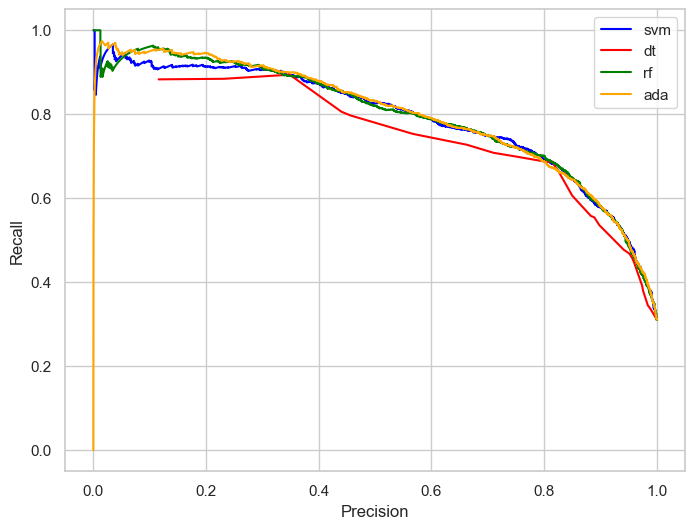

In [234]:
y_valid_svm_df = cross_val_predict(best_svm_clf_model, X_train, y_train, cv=3, method='decision_function')
y_valid_dt_prob = cross_val_predict(best_dt_clf_model, X_train, y_train, cv=3, method='predict_proba')
y_valid_rf_prob = cross_val_predict(best_rf_clf_model, X_train, y_train, cv=3, method='predict_proba')
y_valid_ada_prob = cross_val_predict(best_adaboost_clf_model, X_train, y_train, cv=3, method='predict_proba')

precision_svm_scores, recall_svm_scores, svm_thresholds = precision_recall_curve(y_train, y_valid_svm_df)
precision_dt_scores, recall_dt_scores, dt_thresholds = precision_recall_curve(y_train, y_valid_dt_prob[:, 1])
precision_rf_scores, recall_rf_scores, rf_thresholds = precision_recall_curve(y_train, y_valid_rf_prob[:, 1])
precision_ada_scores, recall_ada_scores, ada_thresholds = precision_recall_curve(y_train, y_valid_ada_prob[:, 1])

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
plt.plot(recall_svm_scores[:-1], precision_svm_scores[:-1], label='svm', color='blue')
plt.plot(recall_dt_scores[:-1], precision_dt_scores[:-1], label='dt', color='red')
plt.plot(recall_rf_scores[:-1], precision_rf_scores[:-1], label='rf', color='green')
plt.plot(recall_ada_scores[:-1], precision_ada_scores[:-1], label='ada', color='orange')

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend()
plt.show()


Text(0, 0.5, 'precision')

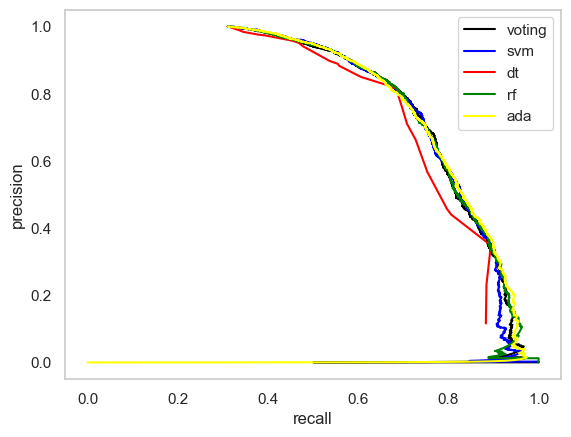

In [257]:
plt.plot(precision_voting_scores[:-1], recall_voting_scores[:-1], label='voting', color='black')
plt.plot(precision_svm_scores[:-1], recall_svm_scores[:-1], label='svm', color='blue')
plt.plot(precision_dt_scores[:-1], recall_dt_scores[:-1], label='dt', color='red')
plt.plot(precision_rf_scores[:-1], recall_rf_scores[:-1], label='rf', color='green')
plt.plot(precision_ada_scores[:-1], recall_ada_scores[:-1], label='ada', color='yellow')
plt.legend()
plt.grid()
plt.xlabel('recall')
plt.ylabel('precision') 

Text(0, 0.5, 'tpr')

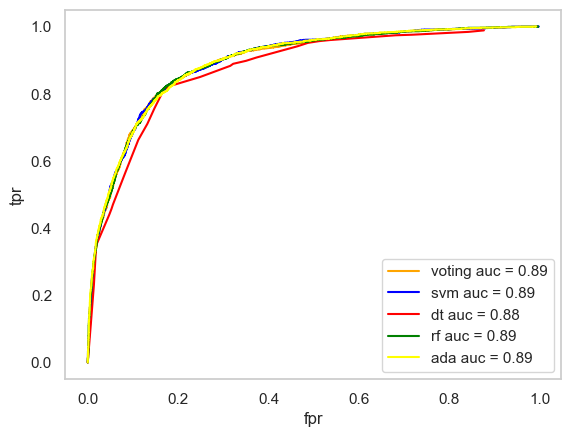

In [258]:
fpr_voting_scores, tpr_voting_scores, voting_roc_thresholds = roc_curve(y_train, y_valid_voting_prob[:, 1])
fpr_svm_scores, tpr_svm_scores, svm_roc_thresholds = roc_curve(y_train, y_valid_svm_df)
fpr_dt_scores, tpr_dt_scores, dt_roc_thresholds = roc_curve(y_train, y_valid_dt_prob[:, 1])
fpr_rf_scores, tpr_rf_scores, rf_roc_thresholds = roc_curve(y_train, y_valid_rf_prob[:, 1])
fpr_ada_scores, tpr_ada_scores, ada_roc_thresholds = roc_curve(y_train, y_valid_ada_prob[:, 1])


plt.plot(fpr_voting_scores[:-1], tpr_voting_scores[:-1], label=f'voting auc = {roc_auc_score(y_train, y_valid_voting_prob[:, 1]):.2f}', color='orange')
plt.plot(fpr_svm_scores[:-1], tpr_svm_scores[:-1], label=f'svm auc = {roc_auc_score(y_train, y_valid_svm_df):.2f}', color='blue')
plt.plot(fpr_dt_scores[:-1], tpr_dt_scores[:-1], label=f'dt auc = {roc_auc_score(y_train, y_valid_dt_prob[:, 1]):.2f}', color='red')
plt.plot(fpr_rf_scores[:-1], tpr_rf_scores[:-1], label=f'rf auc = {roc_auc_score(y_train, y_valid_rf_prob[:, 1]):.2f}', color='green')
plt.plot(fpr_ada_scores[:-1], tpr_ada_scores[:-1], label=f'ada auc = {roc_auc_score(y_train, y_valid_ada_prob[:, 1]):.2f}', color='yellow')
plt.legend()
plt.grid()
plt.xlabel('fpr')
plt.ylabel('tpr')

In [261]:
indx = np.argmax(recall_voting_scores <= 0.80)
t_80_recall = voting_thresholds[indx]
y_voting_prob = cross_val_predict(voting_pipeline, X_train, y_train, cv=3, method='predict_proba')
y_voting_threshold_pred = (y_voting_prob[:, 1] >= t_80_recall)
print(f"Accuracy: {accuracy_score(y_train, y_voting_threshold_pred)}") # accuracy
print(f"F1 Score: {f1_score(y_train, y_voting_threshold_pred)}") # F1
print(f"Precsion: {precision_score(y_train, y_voting_threshold_pred)}") # Precsion
print(f"Recall: {recall_score(y_train, y_voting_threshold_pred)}") # Recall

Accuracy: 0.8295868391309807
F1 Score: 0.7446848541862653
Precsion: 0.6965857092573038
Recall: 0.7999191592562651


In [262]:
confusion_matrix(y_train, y_voting_threshold_pred) 

array([[4627,  862],
       [ 495, 1979]])

# 6) Test Performance and CI

In [263]:
y_voting_test_pred = voting_pipeline.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_voting_test_pred)}") # Test accuracy
print(f"Test F1 Score: {f1_score(y_test, y_voting_test_pred)}") # Test F1
print(f"Test Precsion: {precision_score(y_test, y_voting_test_pred)}") # Test Precsion
print(f"Test Recall: {recall_score(y_test, y_voting_test_pred)}") # Test Recall

Test Accuracy: 0.8407835258663988
Test F1 Score: 0.7585681645087585
Test Precsion: 0.7165467625899281
Test Recall: 0.8058252427184466


In [264]:
confusion_matrix(y_test, y_voting_test_pred)

array([[1176,  197],
       [ 120,  498]])

In [265]:
y_voting_test_scores = voting_pipeline.predict_proba(X_test)
y_voting_test_threshold_pred = (y_voting_test_scores[:, 1] >= t_80_recall)
print(f"Test Accuracy: {accuracy_score(y_test, y_voting_test_threshold_pred)}") # Test accuracy
print(f"Test F1 Score: {f1_score(y_test, y_voting_test_threshold_pred)}") # Test F1
print(f"Test Precsion: {precision_score(y_test, y_voting_test_threshold_pred)}") # Test Precsion
print(f"Test Recall: {recall_score(y_test, y_voting_test_threshold_pred)}") # Test Recall

Test Accuracy: 0.8342541436464088
Test F1 Score: 0.753731343283582
Test Precsion: 0.6994459833795014
Test Recall: 0.8171521035598706


In [266]:
confusion_matrix(y_test, y_voting_test_threshold_pred)

array([[1156,  217],
       [ 113,  505]])

# 7) Save Model

In [236]:
joblib.dump(stacking_pipeline, 'stacking_pipeline.pkl')

['stacking_pipeline.pkl']

In [237]:
joblib.dump(voting_pipeline, 'voting_pipeline.pkl')

['voting_pipeline.pkl']

In [270]:
import sklearn
print( "numpy version: ", np.__version__)
print( "pandas version: ", pd.__version__)
print( "scikit-learn version: ", sklearn.__version__)


numpy version:  2.0.2
pandas version:  2.2.3
scikit-learn version:  1.6.1


In [272]:

import imblearn

print("imbalanced-learn version: ", imblearn.__version__)

imbalanced-learn version:  0.13.0
